# Group Project M7 Programming for Data Science

* Author: Michael Alber, Alexander Merz
* Email: ma094@hdm-stuttgart.de, am182@hdm-stuttgart.de

## Untersuchung der Bauindustrie in Deutschland im Zeitverlauf

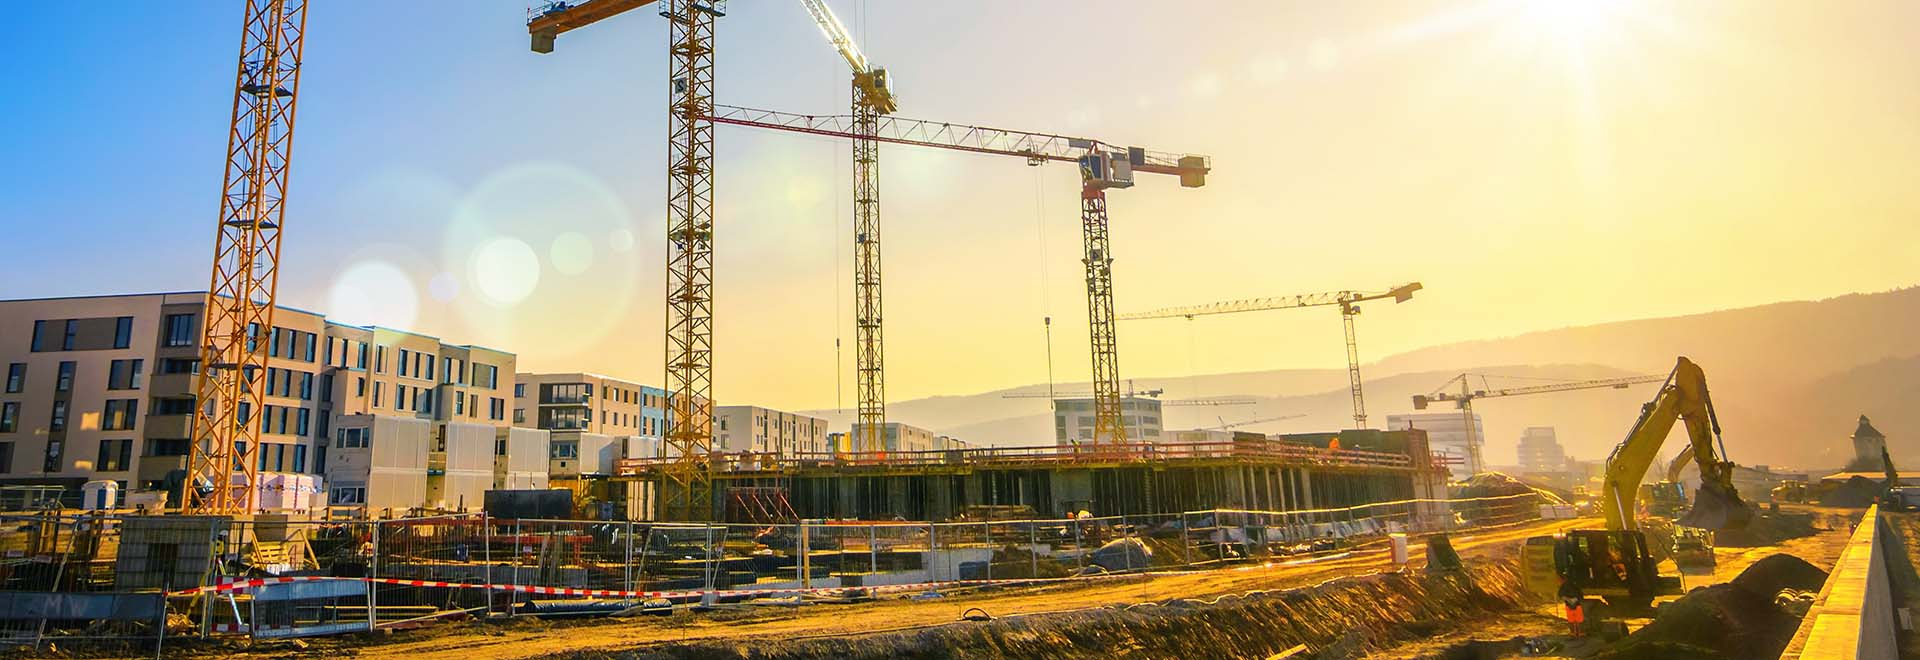

In [1]:
from IPython.display import Image
Image(filename="Titelbild.jpg")

<div class="alert alert-block alert-info">

Quelle:
> https://www.upaconstruccion.com/single-post/2018/04/16/Licitaciones-de-obra-pública-en-Querétaro-2018

# Inhalt

#### A.	[Beschreibung des Datensatzes](#A)

#### B.	[Allgemeine Entwicklungen Gesamtmarkt- und Gesamtdeutschland – Langzeitentwicklung](#B)

#### C.  [Korrelationen](#C)

#### D.	[Detaillierte Entwicklungen je Bundesland](#D)

#### [Fazit](#Fazit)

<div class="alert alert-block alert-info">

## Einleitung

Die vorliegende Arbeit untersucht die Entwicklungen in der Baubranche in den letzten Jahren und versucht herauszuarbeiten, was die maßgeblichen Einflussfaktoren sind. Datengrundlage sind vor allem Erhebungen des Statistischen Bundesamts.

Im Teil A wird auf die wesentlichen Datensätze eingegangen und diese beschrieben.

Im folgenden Teil B werden dann die Entwicklung im Baugewerbe bis 2017 aufgezeigt. Dabei wird auf Themen wie die Anzahl der Baumaßnahmen, auf gebaute Flächen, Kosten für die Baumaßnahmen aber auch Beschäftigung eingegangen.

Teil C versucht abzuleiten, welche Zusammenhänge zwischen gesamtwirtschaftlichen Faktoren, wie Zinsen und Kaufpreisentwicklungen, und Entwicklungen im Baugewerbe herzustellen.

Entwicklungen auf Landesebene werden in Teil D betrachtet.

### Load Data

In [2]:
import m7_toolset as m7

import pandas as pd
import csv
from pandas.tseries.offsets import *
pd.set_option('precision', 0)# da wir nur mit Ganzzahlen arbeiten
pd.set_option('float_format', '{:.0f}'.format)#Darstellung großer Zahlen ohne wissenschaftliche Notation

import geopandas as gpd
from shapely.geometry import shape

import numpy as np
import xlrd

from matplotlib import pyplot as plt
from math import pi

import bokeh
#from bokeh.core.properties import value
from bokeh.plotting import figure, save
from bokeh.io import output_notebook, show
from bokeh.palettes import Viridis3, PuBu
#from bokeh.transform import factor_cmap
#from bokeh.models import NumeralTickFormatter
from bokeh.layouts import gridplot, row, column, widgetbox, layout
from bokeh.transform import cumsum, Stack
from bokeh.transform import linear_cmap
from bokeh.models import LinearAxis, LogAxis, Range1d, ColorBar, LogTicker, BasicTicker, PrintfTickFormatter, GeoJSONDataSource
from bokeh.models import LogColorMapper, BoxAnnotation, Range1d, Legend, ColumnDataSource,HoverTool, CustomJS
from bokeh.models.widgets import Slider

import sys
import seaborn as sns; sns.set()
from seaborn import lineplot
import re
from itertools import islice

import warnings
warnings.filterwarnings('ignore')

In [1]:
#output_notebook()

In [4]:
%matplotlib inline

<a id='A'></a>

# A. Data Exploration

<div class="alert alert-block alert-info">

Datenquelle: https://www-genesis.destatis.de/genesis/online

<div class="alert alert-block alert-info">

## 1. Baufertigstellungen

- Datei: _Baufertigst_Hochbau_Monat.csv    
- Zeitraum: 2008 - 2017
- Themen/Inhalte:Baufertigstellungen im Hochbau nach Bundesländern und Jahren und nach Gebäudeart
- Spalten (zusammengefasst): 
    - Bundesland
    - Gebäudeart
    - Jahr
    - für neue Gebäude- und Baumaßnahmen bestehende Gebäude gesamt, neue Gebäude und Baumaßnahmen bestehende Gebäude jeweils:
        - Anzahl Gebäude bzw. Anzahl Baumaßnahmen
        - Rauminhalt in 1000 cbm
        - Nutzfläche in 1000qm
        - Wohnfläche in 1000 qm
        - Anzahl Wohnungen
        - Anzahl sonstige Wohneinheiten
        - Anzahl Wohnräume
        - Veranschlagte Kosten des Bauwerks bzw. der Baumaßnahme in Tsd. EUR

In [5]:
dfBaufertigSt=m7.getGenesisData("_Baufertigst_Hochbau_Monat.csv", 6,9)
list(dfBaufertigSt)

['Bundesland',
 'Gebäudeart',
 'Jahr',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Anzahl',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Rauminhalt/1000 cbm',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Baumaßnahmen/Anzahl',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Nutzfläche/1000 qm',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnungen/Anzahl',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnfläche der Wohnungen/1000 qm',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Sonstige Wohneinheiten/Anzahl',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnfläche der sonstigen Wohneinheiten/1000 qm',
 'Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnräume/Anzahl',
 'Bautätigkeite

In [6]:
print("Der Datensatz hat folgende Anzahl an Datensätzen und Spalten: ", dfBaufertigSt.shape)
print("Der Datensatz enthält folgende Anzahl befüllte Datenpunkte:",dfBaufertigSt.count().sum().sum())
print("Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten: ",dfBaufertigSt.isnull().sum().sum())

Der Datensatz hat folgende Anzahl an Datensätzen und Spalten:  (5600, 37)
Der Datensatz enthält folgende Anzahl befüllte Datenpunkte: 120182
Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten:  87018


<div class="alert alert-block alert-info">

### Baugenehmigungen

- Datei: _BauGen_HochBau_Monate.csv
- Zeitraum: Januar 2003 - Dezember 2017
- Themen/Inhalte:Baugenehmigungen im Hochbau nach Monaten/Jahren und nach Gebäudeart 
- Spalten (zusammengefasst): 
    - Gebäudeart
    - Jahr
    - Monat
    - für neue Gebäude- und Baumaßnahmen bestehende Gebäude gesamt, neue Gebäude und Baumaßnahmen bestehende Gebäude jeweils:
        - Anzahl Gebäude bzw. Anzahl Baumaßnahmen
        - Rauminhalt in 1000 cbm
        - Nutzfläche in 1000qm
        - Wohnfläche in 1000 qm
        - Anzahl Wohnungen
        - Anzahl sonstige Wohneinheiten
        - Anzahl Wohnräume
        - Veranschlagte Kosten des Bauwerks bzw. der Baumaßnahme in Tsd. EUR

In [7]:
dfBauGen=m7.getGenesisData("_BauGen_HochBau_Monate.csv",7,10)

In [8]:
print("Der Datensatz hat folgende Anzahl an Datensätzen und Spalten: ", dfBauGen.shape)
print("Der Datensatz enthält folgende Anzahl befüllte Datenpunkte:",dfBauGen.count().sum().sum())
print("Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten: ",dfBauGen.isnull().sum().sum())

Der Datensatz hat folgende Anzahl an Datensätzen und Spalten:  (6300, 37)
Der Datensatz enthält folgende Anzahl befüllte Datenpunkte: 147232
Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten:  85868


<div class="alert alert-block alert-info">

### Beschäftigte / Umsatz Bauhauptgewerbe indiziert

- Datei: _Beschäftigte_Umsatz_Bauhauptgewerbe_Monat.csv
- Zeitraum: Januar 2010 - August 2018 (leere Zeilen für September - Dezember 2018 vorhanden)
- Themen/Inhalte:Umsätze und Beschäftigte im Bauhauptgewerbe je Monat / Jahr (indiziert 2010 = 100)
- Spalten: 
    - Key Wirtschaftszweig
    - Wirtschaftszweig
    - Jahr
    - Monat
    - Beschäftigte 
    - Beschäftigte (Veränderung zum Vorjahresmonatin %)
    - Umsatz 
    - Umsatz (Veränderung zum Vorjahresmonat in %)

In [9]:
dfBeschUmsBauHG=m7.getGenesisData("_Beschaeftigte_Umsatz_Bauhauptgewerbe_Monat.csv", 6,7)

In [10]:
print("Der Datensatz hat folgende Anzahl an Datensätzen und Spalten: ", dfBeschUmsBauHG.shape)
print("Der Datensatz enthält folgende Anzahl befüllte Datenpunkte:",dfBeschUmsBauHG.count().sum().sum())
print("Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten: ",dfBeschUmsBauHG.isnull().sum().sum())

Der Datensatz hat folgende Anzahl an Datensätzen und Spalten:  (1512, 9)
Der Datensatz enthält folgende Anzahl befüllte Datenpunkte: 13608
Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten:  0


<div class="alert alert-block alert-info">

### Beschäftigte / Entgelte / Umsatz Bauhauptgewerbe nach Handwerksarten absolut

- Datei: _Pers_Entgelt_Umsatz_BauHauptgew_Monat.csv
- Zeitraum: Januar 1995 - Dezember 2016 (leere Zeilen für Januar 2017 - Dezember 2018 vorhanden)
- Themen/Inhalte:Umsätze, Entgelte und Beschäftigte im Bauhauptgewerbe je Monat / Jahr absolut
- Spalten: 
    - Bundesland
    - Jahr
    - Monat
    - Anzahl Tätige Personen
    - Entgelte in Tsd. EUR
    - Umsatz in Tsd. EUR

In [11]:
dfPersEnt=m7.getGenesisData("_Pers_Entgelt_Umsatz_BauHauptgew_Monat.csv",6 ,7 )

In [12]:
print("Der Datensatz hat folgende Anzahl an Datensätzen und Spalten: ", dfPersEnt.shape)
print("Der Datensatz enthält folgende Anzahl befüllte Datenpunkte:",dfPersEnt.count().sum().sum())
print("Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten: ",dfPersEnt.isnull().sum().sum())

Der Datensatz hat folgende Anzahl an Datensätzen und Spalten:  (4896, 7)
Der Datensatz enthält folgende Anzahl befüllte Datenpunkte: 33048
Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten:  1224


<div class="alert alert-block alert-info">

### Beschäftigte / Entgelte / Umsatz Bauhauptgewerbe absolut

- Datei: Handwerker_Bundeslaender_Personal_Umsatz_nach Gewerbegruppen.csv
- Zeitraum: 2008-2016
- Themen/Inhalte:Umsätze und Beschäftigte im Baugewerbe je Jahr absolut
- Spalten: 
    - Bundesland
    - Jahr
    - Handwerksart
    - Key
    - Gewerbezweig
    - Anzahl Handwerksunternehmen
    - Anzahl Tätige Personen
    - Anzahl Tätige Personen je Unternehmen
    - Anzahl Sozialversicherungspflichtig Beschäftigte
    - Anzahl Geringfügig entlohnte Beschäftigte
    - Umsatz in Tsd. EUR
    - Umsatz je tätige Person in EUR

In [13]:
dfHandwBL=m7.getGenesisData("Handwerker_Bundeslaender_Personal_Umsatz_nach Gewerbegruppen.csv", 5,6)

In [14]:
print("Der Datensatz hat folgende Anzahl an Datensätzen und Spalten: ", dfHandwBL.shape)
print("Der Datensatz enthält folgende Anzahl befüllte Datenpunkte:",dfHandwBL.count().sum().sum())
print("Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten: ",dfHandwBL.isnull().sum().sum())

Der Datensatz hat folgende Anzahl an Datensätzen und Spalten:  (44064, 13)
Der Datensatz enthält folgende Anzahl befüllte Datenpunkte: 418708
Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten:  154124


<div class="alert alert-block alert-info">

### Baufertigstellungen nach Energieart / Heizung / Warmwassergewinnung

- Datei:_BauFertigstellungen_NeueGeb_Art_Energie.csv
- Zeitraum: 2014-2017
- Themen/Inhalte:Baufertigstellungen nach Energieverwendung und Energieart je Jahr
- Spalten: 
    - Jahr
    - Energieverwendung
    - Energieart
    - Key
    - Gebäudearten:
        - Wohngebäude:
            - Wohngebäude mit 1 Wohnung
            - Wohngebäude mit 2 Wohnungen
            - Wohngebäude mit 3 oder mehr Wohnungen
            - Wohnheime
            - Wohngebäude mit Eigentumswohnungen
       -  Nichtwohngebäude
            - Anstaltsgebäude
            - Büro- und Verwaltungsgebäude
            - Landwirtschaftliche Betriebsgebäude
            - Nichtlandwirtschaftliche Betriebsgebäude
            - Fabrik- und Werkstattgebäude
            - Handelsgebäude
            - Warenlagergebäude
            - Hotels und Gaststätten
            - Sonstige Nichtwohngebäude
            - Ausgewählte Infrastrukturgebäude
            

In [15]:
dfEnergie=m7.getGenesisData("_BauFertigstellungen_NeueGeb_Art_Energie.csv", 7,8)

In [16]:
print("Der Datensatz hat folgende Anzahl an Datensätzen und Spalten: ", dfEnergie.shape)
print("Der Datensatz enthält folgende Anzahl befüllte Datenpunkte:",dfEnergie.count().sum().sum())
print("Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten: ",dfEnergie.isnull().sum().sum())

Der Datensatz hat folgende Anzahl an Datensätzen und Spalten:  (192, 21)
Der Datensatz enthält folgende Anzahl befüllte Datenpunkte: 4032
Der Datensatz enthält folgende Anzahl an NaN oder leeren Werten:  0


<a id='B'></a>

# B. Data Analysis

## 1. Baufertigstellungen im Zeitverlauf Gesamtdeutschland

### 1.1	Entwicklung Anzahl Baufertigstellungen Hochbau 

<div class="alert alert-block alert-info">
In diesem  Abschnitt wird analysiert wie sich die Zahl der Neu- und Umbauten insgesamt sowie getrennt nach Wohngebäuden und Nichtwohngebäuden in den Jahren 2008 - 2017 entwickelt hat.

In [17]:
dfBaufertigStSel=dfBaufertigSt.groupby(['Jahr','Gebäudeart'], as_index=False)['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl','Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl',"Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl"].sum()
dfBaufertigStAll=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBaufertigStWgb=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBaufertigStNwgb=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBaufertigStAll.set_index('Jahr')
dfBaufertigStWgb.set_index('Jahr')
dfBaufertigStNwgb.set_index('Jahr')

,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
Jahr,,,,
2008,Nichtwohngebäude,45335,28524,16811
2009,Nichtwohngebäude,42773,26458,16315
2010,Nichtwohngebäude,43738,26990,16748
2011,Nichtwohngebäude,46248,28473,17775
2012,Nichtwohngebäude,44726,27642,17084
2013,Nichtwohngebäude,45284,27583,17701
2014,Nichtwohngebäude,44396,26825,17571
2015,Nichtwohngebäude,41996,25123,16873
2016,Nichtwohngebäude,41740,24402,17338


<div class="alert alert-block alert-info">
Im ersten Schritt wird der Datensatz gruppiert nach Jahr sowie Gebäudeart sowie die relevanten Spalten des zuvor erstellten Dataframes selektiert. Danach erfolgt eine Selektion nach allen Gebäuden, nur den Wohngebäuden sowie nur den Nichtwohngebäuden. Es werdenn aus der der Selektion drei neue Dataframes generiert und die Spalte Jahr als Index gesetzt.

In [18]:
source1Bfert=ColumnDataSource(dfBaufertigStAll)
source2Bfert=ColumnDataSource(dfBaufertigStWgb)
source3Bfert=ColumnDataSource(dfBaufertigStNwgb)
options1=dict(plot_width=500, plot_height=400, y_axis_label='Anzahl', tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1Bfert = figure(title="Baufertigstellungen - Anzahl Wohn- und Nichtwohngebäude", **options1)  
p1Bfert.line(x='Jahr', y='Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl', line_width=3, source=source1Bfert,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p1Bfert.line(x='Jahr', y='Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl', line_width=3, source=source1Bfert,color=Viridis3[1], legend='Neue Gebäude')               
p1Bfert.line(x='Jahr', y='Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl', line_width=3, source=source1Bfert,color=Viridis3[2], legend='Baumaßnahmen bestehende Gebäude')
p1Bfert.yaxis[0].formatter.use_scientific = False
p1Bfert.quad(top=200000, bottom=0, left=2008.5, right=2010, color="#BBBBBB", alpha=0.5)

p2Bfert = figure(title="Anzahl Wohngebäude", **options1)   
p2Bfert.line(x='Jahr', y='Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl', line_width=3, source=source2Bfert,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p2Bfert.line(x='Jahr', y='Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl', line_width=3, source=source2Bfert,color=Viridis3[1], legend='Neue Gebäude')               
p2Bfert.line(x='Jahr', y='Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl', line_width=3, source=source2Bfert,color=Viridis3[2], legend='Baumaßnahmen bestehende Gebäude')
p2Bfert.yaxis[0].formatter.use_scientific = False
p2Bfert.quad(top=160000, bottom=0, left=2008.5, right=2010, color="#BBBBBB", alpha=0.5)


p3Bfert = figure(title="Anzahl Nichtwohngebäude", **options1)   
p3Bfert.line(x='Jahr', y='Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl', line_width=3, source=source3Bfert,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p3Bfert.line(x='Jahr', y='Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl', line_width=3, source=source3Bfert,color=Viridis3[1], legend='Neue Gebäude')               
p3Bfert.line(x='Jahr', y='Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl', line_width=3, source=source3Bfert,color=Viridis3[2], legend='Baumaßnahmen bestehende Gebäude')
p3Bfert.yaxis[0].formatter.use_scientific = False
p3Bfert.quad(top=50000, bottom=0, left=2011, right=2017, color="#BBBBBB", alpha=0.5)

p1Bfert.legend.location = (180,30)
p1Bfert.legend.background_fill_alpha =0.7
p1Bfert.legend.click_policy="hide"
p1Bfert.legend.label_text_font_size = "8pt"
p1Bfert.legend.spacing = -5
p1Bfert.xgrid.grid_line_color = None

p2Bfert.legend.location = (180,30)
p2Bfert.legend.background_fill_alpha =0.7
p2Bfert.legend.click_policy="hide"
p2Bfert.legend.label_text_font_size = "8pt"
p2Bfert.legend.spacing = -5
p2Bfert.xgrid.grid_line_color = None

p3Bfert.legend.location = (180,30)
p3Bfert.legend.background_fill_alpha =0.7
p3Bfert.legend.click_policy="hide"
p3Bfert.legend.label_text_font_size = "8pt"
p3Bfert.legend.spacing = -5
p3Bfert.xgrid.grid_line_color = None

grid1Bfert = gridplot([[p1Bfert,p2Bfert],[p3Bfert, None]], toolbar_location="above")
show(grid1Bfert)


<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Beim Verlauf der Kurven bei den Wohngebäuden ist ein deutlicher Einbruch ab Mitte 2008 zu erkennen. Der Grund hierfür war die einsetzende Finanzkrise. Ab Ende 2010 steigt die Zahl der Baumaßnahmen bei den Wohngebäuden wieder deutlich nach oben. Dies trifft insbesondere auf die Neubauten zu. 

Bei den Nichtwohngebäuden hingegen ist die Delle bei der Finanzkrise auch zu erkennen, wenn auch nicht so ausgeprägt. Interessant ist jedoch die weitere Entwicklung in den späteren Jahren ab 2011. Hier nimmt die Anzahl der Baumaßnahmen im weiteren Verlauf stetig ab.

**Anmerkung zur Erstellung:**
Die Grafiken wurden als Liniencharts generiert, wobei für jede Kategorie eine separate Linie geplottet wurde (im Unterschied zum ebenfalls möglichen Multi-Line Chart). Diese Vorgehensweise hat sich im Laufe der Tests herausgebildet. Mit der Quad Funktion lassen sich die hier grauen Bereiche definieren um auffällige Verläufe hervorzuheben. Die Legende wurde so gestaltet, als dass sie zum einen dort im Diagramm angezeigt wird, wo am meisten Platz ist und zum anderen so, dass man durch Anklicken einzelne Linien im Chart ausblenden kann.

In [19]:
dfBaufertNWgbnachTypOeff=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Öffentliche Bauherren von Nichtwohngebäuden')
dfBaufertNWgbnachTypOeff

,Jahr,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
33,2008,Öffentliche Bauherren von Nichtwohngebäuden,4088,2007,2081
68,2009,Öffentliche Bauherren von Nichtwohngebäuden,4382,2066,2316
103,2010,Öffentliche Bauherren von Nichtwohngebäuden,5238,2360,2878
138,2011,Öffentliche Bauherren von Nichtwohngebäuden,5456,2456,3000
173,2012,Öffentliche Bauherren von Nichtwohngebäuden,4264,1918,2346
208,2013,Öffentliche Bauherren von Nichtwohngebäuden,4668,2117,2551
243,2014,Öffentliche Bauherren von Nichtwohngebäuden,4413,2057,2356
278,2015,Öffentliche Bauherren von Nichtwohngebäuden,3998,1821,2177
313,2016,Öffentliche Bauherren von Nichtwohngebäuden,3759,1601,2158
348,2017,Öffentliche Bauherren von Nichtwohngebäuden,4081,2001,2080


In [20]:
dfBaufertWgbnachTypOeff=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Öffentliche Bauherren von Wohngebäuden')
dfBaufertWgbnachTypOeff

,Jahr,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
34,2008,Öffentliche Bauherren von Wohngebäuden,463,301,158
69,2009,Öffentliche Bauherren von Wohngebäuden,384,218,161
104,2010,Öffentliche Bauherren von Wohngebäuden,332,172,156
139,2011,Öffentliche Bauherren von Wohngebäuden,358,197,158
174,2012,Öffentliche Bauherren von Wohngebäuden,456,271,181
209,2013,Öffentliche Bauherren von Wohngebäuden,511,261,247
244,2014,Öffentliche Bauherren von Wohngebäuden,718,342,371
279,2015,Öffentliche Bauherren von Wohngebäuden,847,416,427
314,2016,Öffentliche Bauherren von Wohngebäuden,1480,765,713
349,2017,Öffentliche Bauherren von Wohngebäuden,1211,735,470


In [21]:
numlines1=len(dfBaufertNWgbnachTypOeff.columns[2:5])
mypalette=Viridis3[0:numlines1]
options1=dict(plot_width=500, plot_height=400, y_axis_label='Anzahl', border_fill_color = "whitesmoke", tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1Oeff = figure(title="Baufertigstellungen - Anzahl Öffentliche Bauherren´Nichtwohngebäude",y_range=(0,dfBaufertNWgbnachTypOeff[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']].values.max()+1000), **options1)   
p1Oeff.multi_line(xs=[dfBaufertNWgbnachTypOeff['Jahr'].values]*numlines1,
                ys=[dfBaufertNWgbnachTypOeff[name].values for name in dfBaufertNWgbnachTypOeff.columns[2:5]],
                line_color=mypalette,
                line_width=3)
p1Oeff.yaxis[0].formatter.use_scientific = False

numlines2=len(dfBaufertWgbnachTypOeff.columns[2:5])
mypalette2=Viridis3[0:numlines2]

p2Oeff = figure(title="Anzahl Öffentliche Bauherren´Wohngebäude", y_range=(0,dfBaufertWgbnachTypOeff[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']].values.max()+100),**options1)    
p2Oeff.multi_line(xs=[dfBaufertWgbnachTypOeff['Jahr'].values]*numlines2,
                ys=[dfBaufertWgbnachTypOeff[name].values for name in dfBaufertWgbnachTypOeff.columns[2:5]],
                line_color=mypalette2,
                line_width=3)
p2Oeff.yaxis[0].formatter.use_scientific = False

grid1Oeff = gridplot([[p1Oeff,p2Oeff]], toolbar_location="above")
show(grid1Oeff)

<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Wie bereits angenommen ist erkennbar, dass die öffentliche Hand insbesondere bei den Nichtwohngebäuden Stützungsmaßnahmen zur Gegensteuerung während der Finanzkrise ergriffen hat.


In [22]:
dfBaufertNWgbnachTypFonds=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Immobilienfonds als Bauherren v.Nichtwohngebäuden')
dfBaufertNWgbnachTypFonds

,Jahr,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
6,2008,Immobilienfonds als Bauherren v.Nichtwohngebäuden,383,205,164
41,2009,Immobilienfonds als Bauherren v.Nichtwohngebäuden,312,174,129
76,2010,Immobilienfonds als Bauherren v.Nichtwohngebäuden,314,148,157
111,2011,Immobilienfonds als Bauherren v.Nichtwohngebäuden,335,139,185
146,2012,Immobilienfonds als Bauherren v.Nichtwohngebäuden,320,150,154
181,2013,Immobilienfonds als Bauherren v.Nichtwohngebäuden,337,156,180
216,2014,Immobilienfonds als Bauherren v.Nichtwohngebäuden,270,105,160
251,2015,Immobilienfonds als Bauherren v.Nichtwohngebäuden,336,129,206
286,2016,Immobilienfonds als Bauherren v.Nichtwohngebäuden,338,124,214
321,2017,Immobilienfonds als Bauherren v.Nichtwohngebäuden,336,125,209


In [23]:
dfBaufertWgbnachTypFonds=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Immobilienfonds als Bauherren von Wohngebäuden')
dfBaufertWgbnachTypFonds

,Jahr,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
7,2008,Immobilienfonds als Bauherren von Wohngebäuden,247,161,85
42,2009,Immobilienfonds als Bauherren von Wohngebäuden,293,209,81
77,2010,Immobilienfonds als Bauherren von Wohngebäuden,250,159,83
112,2011,Immobilienfonds als Bauherren von Wohngebäuden,189,119,54
147,2012,Immobilienfonds als Bauherren von Wohngebäuden,337,213,119
182,2013,Immobilienfonds als Bauherren von Wohngebäuden,268,170,92
217,2014,Immobilienfonds als Bauherren von Wohngebäuden,264,141,117
252,2015,Immobilienfonds als Bauherren von Wohngebäuden,319,161,150
287,2016,Immobilienfonds als Bauherren von Wohngebäuden,438,307,127
322,2017,Immobilienfonds als Bauherren von Wohngebäuden,320,178,137


In [24]:
numlines1=len(dfBaufertNWgbnachTypFonds.columns[2:5])
mypalette=Viridis3[0:numlines1]
options1=dict(plot_width=500, plot_height=400, y_axis_label='Anzahl', border_fill_color = "whitesmoke", tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1Fonds = figure(title="Baufertigstellungen Anzahl - Immobilienfonds´Nichtwohngebäude",y_range=(0,dfBaufertNWgbnachTypFonds[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']].values.max()+100), **options1)   
p1Fonds.multi_line(xs=[dfBaufertNWgbnachTypFonds['Jahr'].values]*numlines1,
                ys=[dfBaufertNWgbnachTypFonds[name].values for name in dfBaufertNWgbnachTypFonds.columns[2:5]],
                line_color=mypalette,
                line_width=3)
p1Fonds.yaxis[0].formatter.use_scientific = False

numlines2=len(dfBaufertWgbnachTypFonds.columns[2:5])
mypalette2=Viridis3[0:numlines2]

p2Fonds = figure(title="Anzahl - Immobilienfonds´Wohngebäude", y_range=(0,dfBaufertWgbnachTypFonds[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']].values.max()+100),**options1)    
p2Fonds.multi_line(xs=[dfBaufertWgbnachTypFonds['Jahr'].values]*numlines2,
                ys=[dfBaufertWgbnachTypFonds[name].values for name in dfBaufertWgbnachTypFonds.columns[2:5]],
                line_color=mypalette2,
                line_width=3)
p2Fonds.yaxis[0].formatter.use_scientific = False

grid1Fonds = gridplot([[p1Fonds,p2Fonds]], toolbar_location="above")
show(grid1Fonds)

<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Eine erste Annahme war, dass Immobilienfonds einen signifikanten Anteil an der Erstellung insbesondere von Nichtwohngebäuden haben. Diese Annahme hat sich bei näherer Betrachtung nicht bestätigt. Im nächsten Schritt wurde daher eine Aggregationsstufe höher ausgewertet: Auf Ebene aller Unternehmen. 

Zudem ist ersichtlich, dass die Immobilienfonds ihr Engagement in der Finanzkrise ebenfalls zurückgefahren haben.

In [25]:
dfBaufertNWgbnachTypUnt=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Unternehmen als Bauherren von Nichtwohngebäuden')
dfBaufertNWgbnachTypUnt

,Jahr,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
21,2008,Unternehmen als Bauherren von Nichtwohngebäuden,31920,21273,10647
56,2009,Unternehmen als Bauherren von Nichtwohngebäuden,29222,19349,9873
91,2010,Unternehmen als Bauherren von Nichtwohngebäuden,28651,19233,9418
126,2011,Unternehmen als Bauherren von Nichtwohngebäuden,29979,20111,9868
161,2012,Unternehmen als Bauherren von Nichtwohngebäuden,29700,19719,9981
196,2013,Unternehmen als Bauherren von Nichtwohngebäuden,29381,19216,10165
231,2014,Unternehmen als Bauherren von Nichtwohngebäuden,28863,18641,10222
266,2015,Unternehmen als Bauherren von Nichtwohngebäuden,27264,17295,9969
301,2016,Unternehmen als Bauherren von Nichtwohngebäuden,26802,16713,10089
336,2017,Unternehmen als Bauherren von Nichtwohngebäuden,25520,15979,9541


In [26]:
dfBaufertWgbnachTypUnt=dfBaufertigStSel.groupby(['Gebäudeart'], as_index=False).get_group('Unternehmen als Bauherren von Wohngebäuden')
dfBaufertWgbnachTypUnt

,Jahr,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
22,2008,Unternehmen als Bauherren von Wohngebäuden,27106,22313,4793
57,2009,Unternehmen als Bauherren von Wohngebäuden,23720,19266,4454
92,2010,Unternehmen als Bauherren von Wohngebäuden,22798,18623,4175
127,2011,Unternehmen als Bauherren von Wohngebäuden,25405,20982,4423
162,2012,Unternehmen als Bauherren von Wohngebäuden,25150,20814,4336
197,2013,Unternehmen als Bauherren von Wohngebäuden,25339,20849,4490
232,2014,Unternehmen als Bauherren von Wohngebäuden,26464,22055,4409
267,2015,Unternehmen als Bauherren von Wohngebäuden,25395,20830,4565
302,2016,Unternehmen als Bauherren von Wohngebäuden,26346,21723,4623
337,2017,Unternehmen als Bauherren von Wohngebäuden,26673,22080,4593


In [27]:
numlines1=len(dfBaufertNWgbnachTypUnt.columns[2:5])
mypalette=Viridis3[0:numlines1]
options1=dict(plot_width=500, plot_height=400, y_axis_label='Anzahl', border_fill_color = "whitesmoke", tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1Unt= figure(title="Baufertigstellungen - Anzahl Unternehmen´Nichtwohngebäude",y_range=(0,dfBaufertNWgbnachTypUnt[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']].values.max()+100), **options1)   
p1Unt.multi_line(xs=[dfBaufertNWgbnachTypUnt['Jahr'].values]*numlines1,
                ys=[dfBaufertNWgbnachTypUnt[name].values for name in dfBaufertNWgbnachTypUnt.columns[2:5]],
                line_color=mypalette,
                line_width=3)
p1Unt.yaxis[0].formatter.use_scientific = False

numlines2=len(dfBaufertWgbnachTypFonds.columns[2:5])
mypalette2=Viridis3[0:numlines2]

p2Unt = figure(title="Anzahl Unternehmen´Wohngebäude", y_range=(0,dfBaufertWgbnachTypUnt[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']].values.max()+100),**options1)    
p2Unt.multi_line(xs=[dfBaufertWgbnachTypUnt['Jahr'].values]*numlines2,
                ys=[dfBaufertWgbnachTypUnt[name].values for name in dfBaufertWgbnachTypUnt.columns[2:5]],
                line_color=mypalette2,
                line_width=3)
p2Unt.yaxis[0].formatter.use_scientific = False

grid1Unt = gridplot([[p1Unt,p2Unt]], toolbar_location="above")
show(grid1Unt)

<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**

Bei den Unternehmen insgesamt zeigt sich ein ähnliches Bild wie bei den Immobilienfonds: Während der Finanzkrise wurde das Engagement zurück gefahren.

### 1.2 Fläche qm Baufertigstellungen Hochbau nach unterschiedlichen Gebäudearten

In [28]:
dfBaufertigSt['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm'] = dfBaufertigSt[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Nutzfläche/1000 qm','Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnfläche der Wohnungen/1000 qm','Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnfläche der sonstigen Wohneinheiten/1000 qm']].sum(axis=1)
dfBaufertigSt['Fläche Gesamt Errichtung neuer Gebäude/1000 qm'] = dfBaufertigSt[['Bautätigkeiten/Errichtung neuer Gebäude/Nutzfläche/1000 qm','Bautätigkeiten/Errichtung neuer Gebäude/Wohnfläche der Wohnungen/1000 qm','Bautätigkeiten/Errichtung neuer Gebäude/Wohnfläche der sonstigen Wohneinheiten/1000 qm']].sum(axis=1)
dfBaufertigSt['Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm'] = dfBaufertigSt[['Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Nutzfläche/1000 qm','Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Wohnfläche der Wohnungen/1000 qm']].sum(axis=1)              

In [29]:
dfBaufertigStSelFl=dfBaufertigSt.groupby(['Jahr','Gebäudeart'], as_index=False)['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm','Fläche Gesamt Errichtung neuer Gebäude/1000 qm','Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm'].sum()
dfBaufertigStAllFl=dfBaufertigStSelFl.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBaufertigStWgbFl=dfBaufertigStSelFl.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBaufertigStNwgbFl=dfBaufertigStSelFl.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBaufertigStAllFl.set_index('Jahr')
dfBaufertigStWgbFl.set_index('Jahr')
dfBaufertigStNwgbFl.set_index('Jahr')

,Gebäudeart,Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm,Fläche Gesamt Errichtung neuer Gebäude/1000 qm,Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm
Jahr,,,,
2008,Nichtwohngebäude,33603,29439,4170
2009,Nichtwohngebäude,31954,28259,3699
2010,Nichtwohngebäude,29588,25733,3863
2011,Nichtwohngebäude,29915,26272,3653
2012,Nichtwohngebäude,30599,26910,3691
2013,Nichtwohngebäude,31211,27528,3687
2014,Nichtwohngebäude,30385,26637,3750
2015,Nichtwohngebäude,28776,25355,3417
2016,Nichtwohngebäude,29451,25800,3655


In [30]:
source1BfertFl=ColumnDataSource(dfBaufertigStAllFl)
source2BfertFl=ColumnDataSource(dfBaufertigStWgbFl)
source3BfertFl=ColumnDataSource(dfBaufertigStNwgbFl)
options1=dict(plot_width=500, plot_height=400, y_axis_label='in 1000 qm', tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1BfertFl = figure(title="Baufertigstellungen - Fläche Wohn- und Nichtwohngebäude", **options1)   
p1BfertFl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm', line_width=3, source=source1BfertFl,color=Viridis3[0], legend='Fläche Neue Geb./Baumaß.')
p1BfertFl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude/1000 qm', line_width=3, source=source1BfertFl,color=Viridis3[1], legend='Fläche neue Gebäude')               
p1BfertFl.line(x='Jahr', y='Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm', line_width=3, source=source1BfertFl,color=Viridis3[2], legend='Fläche Baumaßnahmen bestehende Gebäude')
p1BfertFl.yaxis[0].formatter.use_scientific = False
p1BfertFl.quad(top=70000, bottom=0, left=2008, right=2010, color="#BBBBBB", alpha=0.5)


p2BfertFl = figure(title="Fläche Wohngebäude", **options1)   
p2BfertFl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm', line_width=3, source=source2BfertFl,color=Viridis3[0], legend='Fläche Neue Geb./Baumaß.')
p2BfertFl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude/1000 qm', line_width=3, source=source2BfertFl,color=Viridis3[1], legend='Fläche neue Gebäude')               
p2BfertFl.line(x='Jahr', y='Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm', line_width=3, source=source2BfertFl,color=Viridis3[2], legend='Fläche Baumaßnahmen bestehende Gebäude')
p2BfertFl.yaxis[0].formatter.use_scientific = False
p2BfertFl.quad(top=40000, bottom=0, left=2008, right=2010, color="#BBBBBB", alpha=0.5)

p3BfertFl = figure(title="Fläche Nichtwohngebäude", **options1)   
p3BfertFl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm', line_width=3, source=source3BfertFl,color=Viridis3[0], legend='Fläche Neue Geb./Baumaß.')
p3BfertFl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude/1000 qm', line_width=3, source=source3BfertFl,color=Viridis3[1], legend='Fläche neue Gebäude')               
p3BfertFl.line(x='Jahr', y='Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm', line_width=3, source=source3BfertFl,color=Viridis3[2], legend='Fläche Baumaßnahmen bestehende Gebäude')
p3BfertFl.yaxis[0].formatter.use_scientific = False
p3BfertFl.quad(top=35000, bottom=0, left=2013, right=2015, color="#BBBBBB", alpha=0.5)

p1BfertFl.legend.location = (170,20)
p1BfertFl.legend.background_fill_alpha =0.7
p1BfertFl.legend.click_policy="hide"
p1BfertFl.legend.label_text_font_size = "8pt"
p1BfertFl.legend.spacing = -5
p1BfertFl.xgrid.grid_line_color = None

p2BfertFl.legend.location = (170,20)
p2BfertFl.legend.background_fill_alpha =0.7
p2BfertFl.legend.click_policy="hide"
p2BfertFl.legend.label_text_font_size = "8pt"
p2BfertFl.legend.spacing = -5
p2BfertFl.xgrid.grid_line_color = None

p3BfertFl.legend.location = (170,20)
p3BfertFl.legend.background_fill_alpha =0.7
p3BfertFl.legend.click_policy="hide"
p3BfertFl.legend.label_text_font_size = "8pt"
p3BfertFl.legend.spacing = -5
p3BfertFl.xgrid.grid_line_color = None

grid1BfertFl = gridplot([[p1BfertFl,p2BfertFl],[p3BfertFl, None]], toolbar_location="above")
show(grid1BfertFl)


<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** Analog der Anzahl der Baumaßnahmen war es auch in Bezug auf die Flächen so, dass bei den Wohngebäuden zunächst ein Abschwung im Rahmen der Finanzkrise bis 2010 erkennbar ist und danach ein kontinuierlicher Aufschwung bis heute. Das gilt insbesondere für neuerstellte Gebäude, im schwachen Ausmaß auch für die Baumaßnahmen an Bestandsgebäuden.
Bei den Nichtwohngebäuden zeigt sich auch wiederum ein Rückgang insbesondere bei neuen Gebäuden ab 2013. Bei den Bestandsgebäuden hält der rücklaufende Trend seit Beginn des Betrachtungszeitraums an.

**Anmerkung zur Erstellung:** Die Erstellung der Grafiken unterscheidet sich nicht von denen in B1.

###  1.3 Kosten pro qm Baufertigstellungen Hochbau nach unterschiedlichen Gebäudearten

In [31]:
dfBaufertigSt['Kosten Baumaßnahme Errichtung neuer Gebäude u.Baumaßnahmen/ qm']=dfBaufertigSt['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Veranschlagte Kosten des Bauwerks/Tsd. EUR']/dfBaufertigSt['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm']
dfBaufertigSt['Kosten Baumaßnahme Errichtung neuer Gebäude/ qm']=dfBaufertigSt['Bautätigkeiten/Errichtung neuer Gebäude/Veranschlagte Kosten des Bauwerks/Tsd. EUR']/dfBaufertigSt['Fläche Gesamt Errichtung neuer Gebäude/1000 qm']
dfBaufertigSt['Kosten Baumaßnahme Baumaßnahme bestehendes Gebäude/ qm']=dfBaufertigSt['Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Veranschlagte Kosten des Bauwerks/Tsd. EUR']/dfBaufertigSt['Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm']

In [32]:
dfBaufertigStSelKstqm=dfBaufertigSt.groupby(['Jahr','Gebäudeart'], as_index=False)['Kosten Baumaßnahme Errichtung neuer Gebäude u.Baumaßnahmen/ qm','Kosten Baumaßnahme Errichtung neuer Gebäude/ qm','Kosten Baumaßnahme Baumaßnahme bestehendes Gebäude/ qm'].mean()
dfBaufertigStAllKstqm=dfBaufertigStSelKstqm.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBaufertigStWgbKstqm=dfBaufertigStSelKstqm.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBaufertigStNwgbKstqm=dfBaufertigStSelKstqm.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBaufertigStAllKstqm.set_index('Jahr')
dfBaufertigStWgbKstqm.set_index('Jahr')
dfBaufertigStNwgbKstqm.set_index('Jahr')

,Gebäudeart,Kosten Baumaßnahme Errichtung neuer Gebäude u.Baumaßnahmen/ qm,Kosten Baumaßnahme Errichtung neuer Gebäude/ qm,Kosten Baumaßnahme Baumaßnahme bestehendes Gebäude/ qm
Jahr,,,,
2008,Nichtwohngebäude,809,705,1596
2009,Nichtwohngebäude,875,764,1718
2010,Nichtwohngebäude,960,817,2262
2011,Nichtwohngebäude,983,803,2496
2012,Nichtwohngebäude,979,800,2664
2013,Nichtwohngebäude,1018,872,2545
2014,Nichtwohngebäude,962,835,2757
2015,Nichtwohngebäude,1065,899,2641
2016,Nichtwohngebäude,1083,929,2517


In [33]:
source1BfertKstqm=ColumnDataSource(dfBaufertigStAllKstqm)
source2BfertKstqm=ColumnDataSource(dfBaufertigStWgbKstqm)
source3BfertKstqm=ColumnDataSource(dfBaufertigStNwgbKstqm)
options1=dict(plot_width=500, plot_height=400, y_axis_label='Kosten pro qm', tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1BfertKstqm = figure(title="Baufertigstellungen - Veranschlagte Kosten pro qm Wohn- und Nichtwohngebäude", **options1)   
p1BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Errichtung neuer Gebäude u.Baumaßnahmen/ qm', line_width=3, source=source1BfertKstqm,color=Viridis3[0], legend='Kosten pro qm Neue Geb./Baumaß.')
p1BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Errichtung neuer Gebäude/ qm', line_width=3, source=source1BfertKstqm,color=Viridis3[1], legend='Kosten pro qm Fläche neue Gebäude')               
p1BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Baumaßnahme bestehendes Gebäude/ qm', line_width=3, source=source1BfertKstqm,color=Viridis3[2], legend='Kosten pro qm Baumaßnahmen bestehende Gebäude')
p1BfertKstqm.quad(top=3000, bottom=0, left=2012, right=2014, color="#BBBBBB", alpha=0.5)

p2BfertKstqm = figure(title="Veranschlagte Kosten pro qm Wohngebäude", **options1)   
p2BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Errichtung neuer Gebäude u.Baumaßnahmen/ qm', line_width=3, source=source2BfertKstqm,color=Viridis3[0], legend='Kosten pro qm Neue Geb./Baumaß.')
p2BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Errichtung neuer Gebäude/ qm', line_width=3, source=source2BfertKstqm,color=Viridis3[1], legend='Kosten pro qm neue Gebäude')               
p2BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Baumaßnahme bestehendes Gebäude/ qm', line_width=3, source=source2BfertKstqm,color=Viridis3[2], legend='Kosten pro qm Baumaßnahmen bestehende Gebäude')
p2BfertKstqm.quad(top=3500, bottom=0, left=2009, right=2010, color="#BBBBBB", alpha=0.5)

p3BfertKstqm = figure(title="Veranschlagte Kosten pro qm Nichtwohngebäude", **options1)   
p3BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Errichtung neuer Gebäude u.Baumaßnahmen/ qm', line_width=3, source=source3BfertKstqm,color=Viridis3[0], legend='Kosten pro qm Neue Geb./Baumaß.')
p3BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Errichtung neuer Gebäude/ qm', line_width=3, source=source3BfertKstqm,color=Viridis3[1], legend='Kosten pro qm neue Gebäude')               
p3BfertKstqm.line(x='Jahr', y='Kosten Baumaßnahme Baumaßnahme bestehendes Gebäude/ qm', line_width=3, source=source3BfertKstqm,color=Viridis3[2], legend='Kosten pro qm Baumaßnahmen bestehende Gebäude')
p3BfertKstqm.quad(top=3000, bottom=0, left=2014, right=2016, color="#BBBBBB", alpha=0.5)

p1BfertKstqm.legend.location = "bottom_left"
p1BfertKstqm.legend.background_fill_alpha =0.7
p1BfertKstqm.legend.click_policy="hide"
p1BfertKstqm.legend.label_text_font_size = "8pt"
p1BfertKstqm.legend.spacing = -5
p1BfertKstqm.xgrid.grid_line_color = None

p2BfertKstqm.legend.location = "bottom_left"
p2BfertKstqm.legend.background_fill_alpha =0.7
p2BfertKstqm.legend.click_policy="hide"
p2BfertKstqm.legend.label_text_font_size = "8pt"
p2BfertKstqm.legend.spacing = -5
p2BfertKstqm.xgrid.grid_line_color = None

p3BfertKstqm.legend.location = "bottom_left"
p3BfertKstqm.legend.background_fill_alpha =0.7
p3BfertKstqm.legend.click_policy="hide"
p3BfertKstqm.legend.label_text_font_size = "8pt"
p3BfertKstqm.legend.spacing = -5
p3BfertKstqm.xgrid.grid_line_color = None

grid1BfertKstqm = gridplot([[p1BfertKstqm,p2BfertKstqm],[p3BfertKstqm, None]], toolbar_location="above")
show(grid1BfertKstqm )


<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** Eine nicht weiter überraschende Entwicklung ist, dass im Bereich der Wohngebäude analog der gesunkenen Nachfrage (Anzahl/Fläche) ein Absinken der veranschlagten Kosten je qm zu beobachten ist. Am auffälligsten zu beobachten ist dies aufgrund der Skalierung wiederum an der Linie zu den neuen Gebäuden. Ein weiteres Absinken auf hohen Niveau lässt sich ab 2013 bis 2015 erkennen. Bei den Nichtwohngebäuden ist während der Finanzkrise ab 2008 lediglich ein klein wenig abgeschwächstes Wachstum der qm Preise zu erkennen, ab 2009 dann aber bereits ein starker Anstieg. In den Jahren ab 2014 bis 2016 sinken dann die qm Preise.

**Anmerkung zur Erstellung:** Die Erstellung der Grafiken unterscheidet sich nicht von denen in B1.

### 1.4 Durchschnittliche Fläche in qm Baufertigstellungen Hochbau nach unterschiedlichen Gebäudearten


In [34]:
dfBaufertigSt['Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme']=dfBaufertigSt['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm']/dfBaufertigSt['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']*1000
dfBaufertigSt['Durchschnittliche qm Errichtung neuer Gebäude']=dfBaufertigSt['Fläche Gesamt Errichtung neuer Gebäude/1000 qm']/dfBaufertigSt['Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl']*1000
dfBaufertigSt['Durchschnittliche qm Baumaßnahme bestehendes Gebäude']=dfBaufertigSt['Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm']/dfBaufertigSt['Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl']*1000

In [35]:
dfBaufertigStSelDqm=dfBaufertigSt.groupby(['Jahr','Gebäudeart'], as_index=False)['Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme','Durchschnittliche qm Errichtung neuer Gebäude','Durchschnittliche qm Baumaßnahme bestehendes Gebäude'].mean()
dfBaufertigStAllDqm=dfBaufertigStSelDqm.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBaufertigStWgbDqm=dfBaufertigStSelDqm.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBaufertigStNwgbDqm=dfBaufertigStSelDqm.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBaufertigStAllDqm.set_index('Jahr')
dfBaufertigStWgbDqm.set_index('Jahr')
dfBaufertigStNwgbDqm.set_index('Jahr')

,Gebäudeart,Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme,Durchschnittliche qm Errichtung neuer Gebäude,Durchschnittliche qm Baumaßnahme bestehendes Gebäude
Jahr,,,,
2008,Nichtwohngebäude,953,1365,263
2009,Nichtwohngebäude,928,1349,276
2010,Nichtwohngebäude,764,1168,205
2011,Nichtwohngebäude,734,1090,215
2012,Nichtwohngebäude,782,1178,213
2013,Nichtwohngebäude,809,1224,243
2014,Nichtwohngebäude,748,1111,256
2015,Nichtwohngebäude,757,1205,203
2016,Nichtwohngebäude,760,1188,199


In [36]:
source1BfertDqm=ColumnDataSource(dfBaufertigStAllDqm)
source2BfertDqm=ColumnDataSource(dfBaufertigStWgbDqm)
source3BfertDqm=ColumnDataSource(dfBaufertigStNwgbDqm)
options1=dict(plot_width=500, plot_height=400, y_axis_label='Durchschnittliche qm', tools=["crosshair,pan,wheel_zoom,box_zoom,reset"])

p1BfertDqm = figure(title="Baufertigstellungen - Durchschnittliche qm pro Baumaßnahme Wohn- und Nichtwohngebäude", **options1)   
p1BfertDqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme', line_width=3, source=source1BfertDqm,color=Viridis3[0], legend='Durchschnittliche qm Neue Geb./Baumaß.')
p1BfertDqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude', line_width=3, source=source1BfertDqm, color=Viridis3[1], legend='Durchschnittliche qm Fläche neue Gebäude')               
p1BfertDqm.line(x='Jahr', y='Durchschnittliche qm Baumaßnahme bestehendes Gebäude', line_width=3, source=source1BfertDqm, color=Viridis3[2], legend='Durchschnittliche qm Baumaßnahmen bestehende Gebäude')

p2BfertDqm = figure(title="Durchschnittliche qm pro Baumaßnahme Wohngebäude", **options1)   
p2BfertDqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme', line_width=3, source=source2BfertDqm, color=Viridis3[0], legend='Durchschnittliche qm Neue Geb./Baumaß.')
p2BfertDqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude', line_width=3, source=source2BfertDqm, color=Viridis3[1], legend='Durchschnittliche qm neue Gebäude')               
p2BfertDqm.line(x='Jahr', y='Durchschnittliche qm Baumaßnahme bestehendes Gebäude', line_width=3, source=source2BfertDqm, color=Viridis3[2], legend='Durchschnittliche qm Baumaßnahmen bestehende Gebäude')

p3BfertDqm = figure(title="Durchschnittliche qm pro Baumaßnahme Nichtwohngebäude", **options1)   
p3BfertDqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme', line_width=3, source=source3BfertDqm, color=Viridis3[0], legend='Durchschnittliche qm Neue Geb./Baumaß.')
p3BfertDqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude', line_width=3, source=source3BfertDqm, color=Viridis3[1], legend='Durchschnittliche qm neue Gebäude')               
p3BfertDqm.line(x='Jahr', y='Durchschnittliche qm Baumaßnahme bestehendes Gebäude', line_width=3, source=source3BfertDqm, color=Viridis3[2], legend='Durchschnittliche qm Baumaßnahmen bestehende Gebäude')

p1BfertDqm.legend.location = (180, 40)
p1BfertDqm.legend.background_fill_alpha =0.7
p1BfertDqm.legend.click_policy="hide"
p1BfertDqm.legend.label_text_font_size = "8pt"
p1BfertDqm.legend.spacing = -5
p1BfertDqm.xgrid.grid_line_color = None

p2BfertDqm.legend.location = (180, 40)
p2BfertDqm.legend.background_fill_alpha =0.7
p2BfertDqm.legend.click_policy="hide"
p2BfertDqm.legend.label_text_font_size = "8pt"
p2BfertDqm.legend.spacing = -5
p2BfertDqm.xgrid.grid_line_color = None

p3BfertDqm.legend.location = (180, 40)
p3BfertDqm.legend.background_fill_alpha =0.7
p3BfertDqm.legend.click_policy="hide"
p3BfertDqm.legend.label_text_font_size = "8pt"
p3BfertDqm.legend.spacing = -5
p3BfertDqm.xgrid.grid_line_color = None

grid1BfertDqm = gridplot([[p1BfertDqm,p2BfertDqm],[p3BfertDqm, None]], toolbar_location="above")
show(grid1BfertDqm)

<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** 
Die durchschnittliche Fläche wurde aus Wohn-, Nutz- und sonstigen Flächen berechnet.

Bei den neuen Wohngebäude ist ein Anstieg der Gesamtfläche je Baumaßnahme von 220 qm in 2008 auf ca. 280 qm in 2017 zu beobachten. Bei den Baumaßnahmen an bestehenden Wohngebäuden ist hingegen im Zeitverlauf wenig Veränderung erkennbar.

Bei den Nichtwohngebäuden ist der Trend bei den Flächen im Schnitt im Betrachtungszeitraum eher rückläufig. So werden zu Beginn über alle Baumaßnahmen knapp 1000 qm je Baumaßnahme umgesetzt, in 2017 sind es noch gut 800 qm.

**Anmerkung zur Erstellung:** Die Erstellung der Grafiken unterscheidet sich nicht von denen in B1.

## 2. Baugenehmigungen

In [37]:
dfBauGen.shape

(6300, 37)

In [38]:
dfBauGenSel=dfBauGen.groupby(['Jahr','Gebäudeart'], as_index=False)['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl','Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl',"Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl"].sum()
dfBauGenAll=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBauGenWgb=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBauGenNwgb=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBauGenAll.set_index('Jahr')
dfBauGenWgb.set_index('Jahr')
dfBauGenNwgb.set_index('Jahr')
dfBauGenAll.set_index('Jahr')


,Gebäudeart,Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl,Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl,Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl
Jahr,,,,
2003,Wohn- und Nichtwohngebäude,298779,212341,86438
2004,Wohn- und Nichtwohngebäude,271687,188224,83463
2005,Wohn- und Nichtwohngebäude,242102,169024,73078
2006,Wohn- und Nichtwohngebäude,247830,171485,76345
2007,Wohn- und Nichtwohngebäude,188216,123362,64854
2008,Wohn- und Nichtwohngebäude,184048,119090,64958
2009,Wohn- und Nichtwohngebäude,184523,118999,65524
2010,Wohn- und Nichtwohngebäude,191302,125654,65648
2011,Wohn- und Nichtwohngebäude,213149,144721,68428


In [39]:
from bokeh.models import NumeralTickFormatter
source1 = ColumnDataSource(dfBauGenAll)
source2 = ColumnDataSource(dfBauGenWgb)
source3 = ColumnDataSource(dfBauGenNwgb)

p1bgen = figure(title="Baugenehmigungen - Anzahl Wohn- und Nichtwohngebäude", plot_width=500, plot_height=400)
p1bgen.line(x='Jahr', y='Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl', line_width=2, source=source1,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p1bgen.line(x='Jahr', y='Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl', line_width=2, source=source1, color=Viridis3[1], legend='Neue Geb.')
p1bgen.line(x='Jahr', y='Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl', line_width=2, source=source1, color=Viridis3[2], legend='Best. Geb.')

p2bgen = figure(title="Anzahl Wohngebäude", plot_width=500, plot_height=400)
p2bgen.line(x='Jahr', y='Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl', line_width=2, source=source2,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p2bgen.line(x='Jahr', y='Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl', line_width=2, source=source2, color=Viridis3[1], legend='Neue Geb.')
p2bgen.line(x='Jahr', y='Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl', line_width=2, source=source2, color=Viridis3[2], legend='Best. Geb.')

p3bgen = figure(title="Anzahl Nichtwohngebäude", plot_width=500, plot_height=400)
p3bgen.line(x='Jahr', y='Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl', line_width=2, source=source3,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p3bgen.line(x='Jahr', y='Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl', line_width=2, source=source3, color=Viridis3[1], legend='Neue Geb.')
p3bgen.line(x='Jahr', y='Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl', line_width=2, source=source3, color=Viridis3[2], legend='Best. Geb.')


p1bgen.legend.location = "top_right"
p1bgen.legend.background_fill_alpha =0.0
p1bgen.legend.click_policy="hide"


p2bgen.legend.location = "top_right"
p2bgen.legend.background_fill_alpha =0.0
p2bgen.legend.click_policy="hide"
p2bgen.quad(top=250000, bottom=0, left=2004, right=2008, color="#BBBBBB", alpha=0.5)


p3bgen.legend.location = "bottom_right"
p3bgen.legend.background_fill_alpha =0.0
p3bgen.legend.click_policy="hide"

p3bgen.quad(top=50000, bottom=0, left=2004, right=2008, color="#BBBBBB", alpha=0.5)


p1bgen.yaxis[0].formatter = NumeralTickFormatter(format="0")
p2bgen.yaxis[0].formatter = NumeralTickFormatter(format="0")


grid = gridplot([[p1bgen,p2bgen],[p3bgen, None]], toolbar_location="above")
show(grid)


<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Es zeigt sich, das bereits vor 2004 die Anzahl an Baugenehmigungen neuer Gebäude Rückläufig war. Dieser Trend hatte seinen Tiefpunkt mit der Finanzkrise. 
Dagegen scheint die Finanzkrise keinen bzw. sogar einen verstärkenden Effekt auf die Baugenehmigungen bei Nichtwohngebäuden gehabt zu haben. Möglicherweise wurden sogar gerade wegen der schwächelnden Wirtschaft öffentliche Baumaßnahmen geplant



**Anmerkung zur Erstellung:**
Die Grafiken wurden als Liniencharts generiert, wobei für jede Kategorie eine separate Linie geplottet wurde (im Unterschied zum ebenfalls möglichen Multi-Line Chart). Diese Vorgehensweise hat sich im Laufe der Tests herausgebildet. Mit der Quad Funktion lassen sich die hier grauen Bereiche definieren um auffällige Verläufe hervorzuheben. Die Legende wurde so gestaltet, als dass sie zum einen dort im Diagramm angezeigt wird, wo am meisten Platz ist und zum anderen so, dass man durch Anklicken einzelne Linien im Chart ausblenden kann.

** Vergleich Genehmigungen und Fertigstellungen (Frühindikator für die Planung im Handwerk) **

In [40]:
grid = gridplot([[p1bgen,p1Bfert],[None, None]], toolbar_location="above")
show(grid)

### 2.2 Wohn-/Nutz-/sonstige Fläche in 1000 qm

In [41]:
dfBauGen['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm'] = dfBauGen[['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Nutzfläche/1000 qm','Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnfläche der Wohnungen/1000 qm','Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Wohnfläche der sonstigen Wohneinheiten/1000 qm']].sum(axis=1)
dfBauGen['Fläche Gesamt Errichtung neuer Gebäude/1000 qm'] = dfBauGen[['Bautätigkeiten/Errichtung neuer Gebäude/Nutzfläche/1000 qm','Bautätigkeiten/Errichtung neuer Gebäude/Wohnfläche der Wohnungen/1000 qm','Bautätigkeiten/Errichtung neuer Gebäude/Wohnfläche der sonstigen Wohneinheiten/1000 qm']].sum(axis=1)
dfBauGen['Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm'] = dfBauGen[['Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Nutzfläche/1000 qm','Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Wohnfläche der Wohnungen/1000 qm']].sum(axis=1)              

In [42]:
dfBauGenSelFl=dfBauGen.groupby(['Jahr','Gebäudeart'], as_index=False)['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm','Fläche Gesamt Errichtung neuer Gebäude/1000 qm','Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm'].sum()
dfBauGenAllFl=dfBauGenSelFl.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBauGenWgbFl=dfBauGenSelFl.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBauGenNwgbFl=dfBauGenSelFl.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBauGenAllFl.set_index('Jahr')
dfBauGenWgbFl.set_index('Jahr')
dfBauGenNwgbFl.set_index('Jahr')

,Gebäudeart,Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm,Fläche Gesamt Errichtung neuer Gebäude/1000 qm,Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm
Jahr,,,,
2003,Nichtwohngebäude,31087,27592,3499
2004,Nichtwohngebäude,29259,25605,3656
2005,Nichtwohngebäude,29138,25052,4088
2006,Nichtwohngebäude,32404,28321,4076
2007,Nichtwohngebäude,35107,30824,4288
2008,Nichtwohngebäude,40383,35240,5153
2009,Nichtwohngebäude,32815,29144,3677
2010,Nichtwohngebäude,32186,28383,3806
2011,Nichtwohngebäude,34963,30665,4295


In [43]:
source1 = ColumnDataSource(dfBauGenAllFl)
source2 = ColumnDataSource(dfBauGenWgbFl)
source3 = ColumnDataSource(dfBauGenNwgbFl)


p1bgenfl = figure(title="Baugenehmigungen - Flächen Wohn- und Nichtwohngebäude", plot_width=500, plot_height=400)
p1bgenfl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm', line_width=2, source=source1,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p1bgenfl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude/1000 qm', line_width=2, source=source1, color=Viridis3[1], legend='Neue Geb.')
p1bgenfl.line(x='Jahr', y='Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm', line_width=2, source=source1, color=Viridis3[2], legend='Best. Geb.')
p1bgenfl.yaxis.axis_label = "1000 qm"

p2bgenfl = figure(title="Flächen Wohngebäude", plot_width=500, plot_height=400)
p2bgenfl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm', line_width=2, source=source2,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p2bgenfl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude/1000 qm', line_width=2, source=source2, color=Viridis3[1], legend='Neue Geb.')
p2bgenfl.line(x='Jahr', y='Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm', line_width=2, source=source2, color=Viridis3[2], legend='Best. Geb.')

p3bgenfl = figure(title="Flächen Nichtwohngebäude", plot_width=500, plot_height=400)
p3bgenfl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm', line_width=2, source=source3,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p3bgenfl.line(x='Jahr', y='Fläche Gesamt Errichtung neuer Gebäude/1000 qm', line_width=2, source=source3, color=Viridis3[1], legend='Neue Geb.')
p3bgenfl.line(x='Jahr', y='Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm', line_width=2, source=source3, color=Viridis3[2], legend='Best. Geb.')


p1bgenfl.legend.location = "bottom_left"
p1bgenfl.legend.background_fill_alpha =0.0
p1bgenfl.legend.click_policy="hide"


p2bgenfl.legend.location = "bottom_left"
p2bgenfl.legend.background_fill_alpha =0.0
p2bgenfl.legend.click_policy="hide"
p2bgenfl.quad(top=40000, bottom=15000, left=2004, right=2008, color="#BBBBBB", alpha=0.5)


p3bgenfl.legend.location = "bottom_left"
p3bgenfl.legend.background_fill_alpha =0.0
p3bgenfl.legend.click_policy="hide"
p3bgenfl.quad(top=40000, bottom=15000, left=2004, right=2009, color="#BBBBBB", alpha=0.5)

grid = gridplot([[p1bgenfl,p2bgenfl],[p3bgenfl, None]], toolbar_location="above")
show(grid)


<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Die Summe der bebauten Flächen bei Wohnebäuden sind bereits 2004 rückläufig. Im Gegensatz stehen Nichtwohngebäude die Bis zur Wirtschaftskrise an bebauten Flächen pro Jahr zunehmen. 



### 2.3 Durchschnittliche Fläche (=Wohn-/Nutz-/sonstige Fläche qm / Anzahl Gebäude bzw. Baumaßnahmen¶

In [44]:
dfBauGen['Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme']=dfBauGen['Fläche Gesamt Errichtung neuer Gebäude u.Baumaßnahmen/1000 qm']/dfBauGen['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl']*1000
dfBauGen['Durchschnittliche qm Errichtung neuer Gebäude']=dfBauGen['Fläche Gesamt Errichtung neuer Gebäude/1000 qm']/dfBauGen['Bautätigkeiten/Errichtung neuer Gebäude/Gebäude/Anzahl']*1000
dfBauGen['Durchschnittliche qm Baumaßnahme bestehendes Gebäude']=dfBauGen['Fläche Gesamt Baumaßnahmen an einem bestehenden Gebäude/1000 qm']/dfBauGen['Bautätigkeiten/Baumaßnahmen an einem bestehenden Gebäude/Baumaßnahmen/Anzahl']*1000

In [45]:
dfBauGenSelDqm=dfBauGen.groupby(['Jahr','Gebäudeart'], as_index=False)['Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme','Durchschnittliche qm Errichtung neuer Gebäude','Durchschnittliche qm Baumaßnahme bestehendes Gebäude'].mean()
dfBauGenAllDqm=dfBauGenSelDqm.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBauGenWgbDqm=dfBauGenSelDqm.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBauGenNwgbDqm=dfBauGenSelDqm.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')
dfBauGenAllDqm.set_index('Jahr')
dfBauGenWgbDqm.set_index('Jahr')
dfBauGenNwgbDqm.set_index('Jahr')

,Gebäudeart,Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme,Durchschnittliche qm Errichtung neuer Gebäude,Durchschnittliche qm Baumaßnahme bestehendes Gebäude
Jahr,,,,
2003,Nichtwohngebäude,709,975,225
2004,Nichtwohngebäude,664,914,228
2005,Nichtwohngebäude,677,935,252
2006,Nichtwohngebäude,698,970,237
2007,Nichtwohngebäude,750,1054,244
2008,Nichtwohngebäude,800,1119,274
2009,Nichtwohngebäude,682,999,193
2010,Nichtwohngebäude,640,917,197
2011,Nichtwohngebäude,676,956,220


In [46]:
source1 = ColumnDataSource(dfBauGenAllDqm)
source2 = ColumnDataSource(dfBauGenWgbDqm)
source3 = ColumnDataSource(dfBauGenNwgbDqm)


p1bgendqm = figure(title="Baugenehmigungen - ØFlächen Wohn- und Nichtwohngebäude", plot_width=500, plot_height=400)
p1bgendqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme', line_width=2, source=source1,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p1bgendqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude', line_width=2, source=source1, color=Viridis3[1], legend='Neue Geb.')
p1bgendqm.line(x='Jahr', y='Durchschnittliche qm Baumaßnahme bestehendes Gebäude', line_width=2, source=source1, color=Viridis3[2], legend='Best. Geb.')
p1bgendqm.yaxis.axis_label = "qm"

p2bgendqm = figure(title="ØFlächen Wohngebäude", plot_width=500, plot_height=400)
p2bgendqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme', line_width=2, source=source2,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p2bgendqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude', line_width=2, source=source2, color=Viridis3[1], legend='Neue Geb.')
p2bgendqm.line(x='Jahr', y='Durchschnittliche qm Baumaßnahme bestehendes Gebäude', line_width=2, source=source2, color=Viridis3[2], legend='Best. Geb.')

p3bgendqm = figure(title="ØFlächen Nichtwohngebäude", plot_width=500, plot_height=400)
p3bgendqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude und Baumaßnahme', line_width=2, source=source3,color=Viridis3[0], legend='Neue Geb./Baumaß.')
p3bgendqm.line(x='Jahr', y='Durchschnittliche qm Errichtung neuer Gebäude', line_width=2, source=source3, color=Viridis3[1], legend='Neue Geb.')
p3bgendqm.line(x='Jahr', y='Durchschnittliche qm Baumaßnahme bestehendes Gebäude', line_width=2, source=source3, color=Viridis3[2], legend='Best. Geb.')


p1bgendqm.legend.location = "bottom_left"
p1bgendqm.legend.background_fill_alpha =0.0
p1bgendqm.legend.click_policy="hide"


p2bgendqm.legend.location = "bottom_left"
p2bgendqm.legend.background_fill_alpha =0.0
p2bgendqm.legend.click_policy="hide"
p2bgendqm.quad(top=250, bottom=150, left=2004, right=2008, color="#BBBBBB", alpha=0.5)


p3bgendqm.legend.location = "bottom_left"
p3bgendqm.legend.background_fill_alpha =0.0
p3bgendqm.legend.click_policy="hide"
p3bgendqm.quad(top=1200, bottom=500, left=2008, right=2012, color="#BBBBBB", alpha=0.5)

grid = gridplot([[p1bgendqm,p2bgendqm],[p3bgendqm, None]], toolbar_location="above")
show(grid)

<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Im Gegensatz zu den Rückläufigen Baugenehmigungen während der Krise, stieg die Fläche der einzelnen Baumaßnahmen an (Gewinner der Krise?). Bei Nichtwohngebäuden war ein Gegenläufiger Trend zu beobachten (Risikoaverse Investitionen bei Öffentlichen und Unternehmen). Möglicherweise hat sich auch die Struktur hin zu mehr Mehrfamilienhäusern verändert

## 3. Beschäftige und Umsatz Bauhauptgewerbe indiziert 

### 3.1 Index Beschäftigte und Umsatz / Produktivität

In [47]:
dfBeschUmsBauHG=m7.getGenesisData("_Beschaeftigte_Umsatz_Bauhauptgewerbe_Monat.csv", 6,7)

In [48]:
#format string to fit float
dfBeschUmsBauHG["Beschäftigte/2010=100_float"]=dfBeschUmsBauHG["Beschäftigte/2010=100"].replace(",",".", regex=True)
dfBeschUmsBauHG["Umsatz/2010=100_float"]=dfBeschUmsBauHG["Umsatz/2010=100"].replace(",",".", regex=True)

dfBeschUmsBauHG["Beschäftigte/2010=100_float"] = pd.to_numeric(dfBeschUmsBauHG["Beschäftigte/2010=100_float"], errors="coerce")
dfBeschUmsBauHG["Umsatz/2010=100_float"] = pd.to_numeric(dfBeschUmsBauHG["Umsatz/2010=100_float"], errors="coerce")

dfBeschUmsBauHG.set_index('Date', inplace=True)


In [49]:
dfBeschUmsBauHG

,Key Wirtschaftszweig,Wirtschaftszweig,Jahr,Monat,Beschäftigte/2010=100,Veränderung zum Vorjahresmon./in (%),Umsatz/2010=100,Veränderung zum Vorjahres/in (%),Beschäftigte/2010=100_float,Umsatz/2010=100_float
Date,,,,,,,,,,
2010-01-01,WZ08-F-01,Bauhauptgewerbe,2010,1,"93,3",.,42,.,93,42
2010-02-01,WZ08-F-01,Bauhauptgewerbe,2010,2,"92,5",.,"47,3",.,92,47
2010-03-01,WZ08-F-01,Bauhauptgewerbe,2010,3,"95,8",.,"77,3",.,96,77
2010-04-01,WZ08-F-01,Bauhauptgewerbe,2010,4,"99,3",.,"93,7",.,99,94
2010-05-01,WZ08-F-01,Bauhauptgewerbe,2010,5,"100,7",.,"100,8",.,101,101
2010-06-01,WZ08-F-01,Bauhauptgewerbe,2010,6,"101,7",.,115,.,102,115
2010-07-01,WZ08-F-01,Bauhauptgewerbe,2010,7,"102,2",.,"117,7",.,102,118
2010-08-01,WZ08-F-01,Bauhauptgewerbe,2010,8,"103,5",.,114,.,104,114
2010-09-01,WZ08-F-01,Bauhauptgewerbe,2010,9,"104,4",.,"121,5",.,104,122


In [50]:
dfBeschUmsBauHG.groupby("Wirtschaftszweig")["Wirtschaftszweig"].count()

Wirtschaftszweig
Abbrucharbeiten u. vorbereit. Baustellenarbeiten      108
Bau von Gebäuden                                      108
Bau von Straßen                                       108
Bau von Straßen und Bahnverkehrsstrecken              108
Bauhauptgewerbe                                       108
Dachdeckerei und Bauspenglerei                        108
Dachdeckerei und Zimmerei                             108
Leitungstiefbau und Kläranlagenbau                    108
Rohrleitungstiefbau, Brunnenbau und Kläranlagenbau    108
Sonstige spezialisierte Bautätigkeiten                108
Sonstige spezialisierte Bautätigkeiten a.n.g.         108
Sonstiger Tiefbau                                     108
Tiefbau                                               108
Zimmerei und Ingenieurholzbau                         108
Name: Wirtschaftszweig, dtype: int64

In [51]:
dfBeschUmsBauHGMedGr=dfBeschUmsBauHG.groupby(['Wirtschaftszweig'], as_index=False).get_group('Bauhauptgewerbe')
dfBeschUmsBauHGMed=dfBeschUmsBauHGMedGr.groupby([(dfBeschUmsBauHGMedGr.index.year)]).mean()

In [52]:
source = ColumnDataSource(dfBeschUmsBauHGMed)
p1 = figure()

p1.line(x='Date', y='Beschäftigte/2010=100_float', line_width=2, source=source, legend='Beschäftigte')
p1.line(x='Date', y='Umsatz/2010=100_float', line_width=2, source=source, color=Viridis3[0], legend='Umsatz')
p1.legend.location = "top_left"
p1.yaxis.axis_label = 'index 2010=100'
p1.legend.click_policy="hide"
show(p1)

<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Der Umsatz im Baugewerbe steigt seit 2010 überproportinal zu den Beschäftigten. Dies ist auf den deutlich höheren Bedarf an Handwerkern zurückzuführen.

## 4. Umsatz, Anzahl Unternehmen und Personalentwicklung im Bauhaupt- und Ausbaugewerbe im Zeitverlauf

### 4.1 - 4.4 Umsatz, Anzahl tätige Personen, Umsatz und Umsatz je tätiger Person

In [53]:
dfBauHauptG=dfHandwBL.groupby(['Key','Art'], as_index=False).get_group(('GEWGR-01','Handwerk insgesamt'))
dfAusbauG=dfHandwBL.groupby(['Key','Art'], as_index=False).get_group(('GEWGR-02','Handwerk insgesamt'))
dfBauHauptG['Umsatz je tätige Person/EUR']=dfBauHauptG['Umsatz je tätige Person/EUR'].astype("float64")
dfAusbauG['Umsatz je tätige Person/EUR']=dfAusbauG['Umsatz je tätige Person/EUR'].astype("float64")

<div class="alert alert-block alert-info">

Zur Erstellung dieser Analyse wurde die entsprechende Datenquelle wieder über die generierte Funktion geladen.
Dann im nächsten Schritt wurde der Datensatz nach Schlüssel Gewerbeart (key) und Art des Handwerks gruppiert und die Subkategorien Ausbaugewerbe (GEWGR-02) sowie Bauhauptgewerbe (GEWGR-01) sowie Ebene "Handwerk gesamt" gruppiert.

Danach wurde bei beiden generierten Dataframes die Spalte "Umsatz je tätige Person/EUR" in den Datentyp float64 umgewandelt.

In [54]:
dfBauHauptGKennz=dfBauHauptG.groupby(['Jahr'], as_index=False).agg({'Handwerksunternehmen/Anzahl':'sum',
                                                                "Tätige Personen/Anzahl":'sum',
                                                                "Umsatz/Tsd. EUR":'sum',
                                                               })
dfBauHauptGKennz['Gewichteter Umsatz je tätige Person/EUR']=dfBauHauptGKennz['Umsatz/Tsd. EUR']/dfBauHauptGKennz['Tätige Personen/Anzahl']*1000
dfBauHauptGKennz


dfAusbauGKennz=dfAusbauG.groupby(['Jahr'], as_index=False).agg({'Handwerksunternehmen/Anzahl':'sum',
                                                                "Tätige Personen/Anzahl":'sum',
                                                                "Umsatz/Tsd. EUR":'sum',
                                                               })
dfAusbauGKennz['Gewichteter Umsatz je tätige Person/EUR']=dfAusbauGKennz['Umsatz/Tsd. EUR']/dfAusbauGKennz['Tätige Personen/Anzahl']*1000
dfBauHauptGKennz

,Jahr,Handwerksunternehmen/Anzahl,Tätige Personen/Anzahl,Umsatz/Tsd. EUR,Gewichteter Umsatz je tätige Person/EUR
0,2008,78035,637907,70678609,110798
1,2009,76807,646784,68374586,105715
2,2010,76796,656984,73755052,112263
3,2011,77434,670196,78847250,117648
4,2012,77766,669869,82855035,123688
5,2013,76514,672226,79805198,118718
6,2014,77340,697256,83670142,119999
7,2015,75264,698677,85514233,122395
8,2016,71940,694968,89168438,128306


<div class="alert alert-block alert-info">

Im folgenden Schritt erfolgt eine Aggregation unterschiedlicher Spalten auf Ebene Jahr, sowie die Ableitung der Kennzahl "Gewichteter Umsatz je tätige Person/EUR".

### Ausbaugewerbe

In [55]:
source = ColumnDataSource(dfAusbauGKennz)
options=dict(plot_width=500, plot_height=400,tools=["pan,wheel_zoom,box_zoom,reset"])


p1Um = figure(y_range=(dfAusbauGKennz[['Handwerksunternehmen/Anzahl']].values.max()-100000, dfAusbauGKennz[['Handwerksunternehmen/Anzahl']].values.max()+10000),title="Handwerksunternehmen/Anzahl Ausbaugewerbe", y_axis_label='Anzahl', **options)
p1Um.vbar(x="Jahr", top='Handwerksunternehmen/Anzahl',width=0.7, source=source,color='#440154')
p1Um.yaxis[0].formatter.use_scientific = False


p2Um = figure(y_range=(dfAusbauGKennz[['Tätige Personen/Anzahl']].values.max()-500000, dfAusbauGKennz[['Tätige Personen/Anzahl']].values.max()+10000),title="Tätige Personen/Anzahl Ausbaugewerbe",y_axis_label='Anzahl', **options)
p2Um.vbar(x="Jahr", top='Tätige Personen/Anzahl',width=0.7, source=source,color='#30678D')
p2Um.yaxis[0].formatter.use_scientific = False

p3Um = figure(y_range=(dfAusbauGKennz[['Umsatz/Tsd. EUR']].values.max()-50000000, dfAusbauGKennz[['Umsatz/Tsd. EUR']].values.max()+1000000),title="Umsatz/Tsd. EUR Ausbaugewerbe",y_axis_label='Tsd. EUR', **options)
p3Um.vbar(x="Jahr", top='Umsatz/Tsd. EUR',width=0.7, source=source, color='#35B778')
p3Um.yaxis[0].formatter.use_scientific = False

p4Um = figure(y_range=(dfAusbauGKennz[['Gewichteter Umsatz je tätige Person/EUR']].values.max()-30000, dfAusbauGKennz[['Gewichteter Umsatz je tätige Person/EUR']].values.max()+10000),title="Gewichteter Umsatz je tätige Person/EUR Ausbaugewerbe",y_axis_label='EUR',**options)
p4Um.vbar(x="Jahr", top='Gewichteter Umsatz je tätige Person/EUR',width=0.7, source=source, color='#FDE724')
p4Um.yaxis[0].formatter.use_scientific = False

GridUm1 = gridplot([[p1Um, p2Um],[p3Um, p4Um]], toolbar_location="above")
show(GridUm1)

<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** Interessant ist die Entwicklung im Ausbaugewerbe dahingegehend als, dass die Zahl der Unternehmen bundesweit abgenommen hat (insbesondere in den Jahren nach 2014), im gleichen Zeitraum jedoch die Zahl der insgesamt in diesem Gewerbe tätigen Personen stetig zugenommen hat. In Summe bedeutet das nichts anderes als eine Konzentration auf weniger, aber größere Unternehmen.

Was den Umsatz anbelangt, hinterlässt die Finanzkrise in Summe eine leichte Delle im Jahr 2009, in den Jahren danach beginnt jedoch ein lang anhaltender Umsatzanstieg bis zum Ende des Betrachtungszeitraums 2016 auf knapp 150  Mrd. EUR, lediglich 2012 und 2013 ist ein leichter Rückgang zu beobachten. Beim Umsatz je tätiger Person ist ein Produktiviätszuwachs über den Zeitraum 2008 -2016 zu beobachten. Zuletzt wurden knapp 105 TEUR pro Kopf erzielt. Lediglich in den Jahren 2009, 2012 und 2013 sinkt die Produktivität. Im Jahr 2009 ist das dadurch zu begründen, als dass im Handwerk bei rückläufigen Umsatzzahlen das Personal weitestgehend konstant gehalten hat. In den Jahren 2010 und 2011 ist ein starker Anstieg der Produktivität erkennbar, begründet dadurch dass die Einstellungen nicht mit dem starken Anstieg des Geschäfts Schritt halten konnten.

**Anmerkung zur Erstellung:**
Die Säulendiagramme wurden enstsprechend dem Bokeh Standard aufgebaut. Die maximale Ausprägung der Y-Achse orientiert sich dabei an den Maximalwerten der jeweiligen Unterkategorie. Auf der X- Achse wird der zeitliche Verlauf abgebildet. 

### Bauhauptgewerbe

In [56]:
source = ColumnDataSource(dfBauHauptGKennz)
options=dict(plot_width=500, plot_height=400,tools=["pan,wheel_zoom,box_zoom,reset"])


p5Um = figure(y_range=(dfBauHauptGKennz[['Handwerksunternehmen/Anzahl']].values.max()-50000, dfBauHauptGKennz[['Handwerksunternehmen/Anzahl']].values.max()+10000),title="Handwerksunternehmen/Anzahl Bauhauptgewerbe", y_axis_label='Anzahl', **options)
p5Um.vbar(x="Jahr", top='Handwerksunternehmen/Anzahl',width=0.7, source=source,color='#440154')
p5Um.yaxis[0].formatter.use_scientific = False


p6Um = figure(y_range=(dfBauHauptGKennz[['Tätige Personen/Anzahl']].values.max()-500000, dfBauHauptGKennz[['Tätige Personen/Anzahl']].values.max()+10000),title="Tätige Personen/Anzahl Bauhauptgewerbe",y_axis_label='Anzahl', **options)
p6Um.vbar(x="Jahr", top='Tätige Personen/Anzahl',width=0.7, source=source,color='#30678D')
p6Um.yaxis[0].formatter.use_scientific = False

p7Um = figure(y_range=(dfBauHauptGKennz[['Umsatz/Tsd. EUR']].values.max()-50000000, dfBauHauptGKennz[['Umsatz/Tsd. EUR']].values.max()+1000000),title="Umsatz/Tsd. EUR Bauhauptgewerbe",y_axis_label='Tsd. EUR', **options)
p7Um.vbar(x="Jahr", top='Umsatz/Tsd. EUR',width=0.7, source=source, color='#35B778')
p7Um.yaxis[0].formatter.use_scientific = False

p8Um = figure(y_range=(dfBauHauptGKennz[['Gewichteter Umsatz je tätige Person/EUR']].values.max()-30000, dfBauHauptGKennz[['Gewichteter Umsatz je tätige Person/EUR']].values.max()+10000),title="Gewichteter Umsatz je tätige Person/EUR Bauhauptgewerbe",y_axis_label='EUR',**options)
p8Um.vbar(x="Jahr", top='Gewichteter Umsatz je tätige Person/EUR',width=0.7, source=source, color='#FDE724')
p8Um.yaxis[0].formatter.use_scientific = False

GridUm2 = gridplot([[p5Um, p6Um],[p7Um, p8Um]], toolbar_location="above")
show(GridUm2)

<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** Die Entwicklungen im Bauhauptgewerbe entsprechen weitestgehend denen im größeren Ausbaugewerbe. Auch hier ist eine Konzentration auf weniger, größere Betriebe zu erkennen, wobei diese Entwicklung zeitlich früher eingesetzt hat als im Ausbaugewerbe.

Auch mit Blick auf den Umsatz aller Unternehmen entspricht die grundsätzliche Entwicklung der im Ausbaugewerbe. Die Umsätze der Branche sind auf zuletzt 90 Mrd. EUR angestiegen. Die Produktivität - gemessen am Umsatz pro tätiger Person - liegt mit zuletzt fast 130 TEUR höher als im Ausbaugewerbe. Schwankungens in insbesondere in der Finanzkrise als auch ab 2012 zu beobachten.

**Anmerkung zur Erstellung:**
Vorgehensweise analog Vorgehensweise B 5.

## 5. Analyse Energiearten Primärenergie Heizung und Warmwasser Neubau Wohngebäude 2014 vs. 2017

In [57]:
dfEnergieReldata=dfEnergie.loc[:,'Jahr':'Gebäudeart/Wohngebäude']
dfEnergie2014=dfEnergieReldata.groupby(['Jahr','Energieverwendung'], as_index=False).get_group((2014,'Zur Heizung verwendete primäre Energie'))
dfEnergie2017=dfEnergieReldata.groupby(['Jahr','Energieverwendung'], as_index=False).get_group((2017,'Zur Heizung verwendete primäre Energie'))
dfEnergie2014['Anteil']=dfEnergie2014['Gebäudeart/Wohngebäude']/dfEnergie2014['Gebäudeart/Wohngebäude'].sum()*100
dfEnergie2017['Anteil']=dfEnergie2017['Gebäudeart/Wohngebäude']/dfEnergie2017['Gebäudeart/Wohngebäude'].sum()*100
dfEnergie2014

,Jahr,Energieverwendung,Energieart,Gebäudeart/Wohngebäude,Anteil
0,2014,Zur Heizung verwendete primäre Energie,Öl,1344,1
1,2014,Zur Heizung verwendete primäre Energie,Gas,55269,51
2,2014,Zur Heizung verwendete primäre Energie,Strom,1009,1
3,2014,Zur Heizung verwendete primäre Energie,Fernwärme/Fernkälte,8604,8
4,2014,Zur Heizung verwendete primäre Energie,Geothermie,8847,8
5,2014,Zur Heizung verwendete primäre Energie,Umweltthermie,25788,24
6,2014,Zur Heizung verwendete primäre Energie,Solarthermie,670,1
7,2014,Zur Heizung verwendete primäre Energie,Holz,6020,6
8,2014,Zur Heizung verwendete primäre Energie,Biogas/Biomethan,206,0
9,2014,Zur Heizung verwendete primäre Energie,Sonstige Biomasse,367,0


<div class="alert alert-block alert-info">

In Vorbereitung der beiden Kreisdiagramme für die Analyse der Anteile an der Primärenergie Heizung und Warmwasser im Neubau wurde wieder die entsprechende Datei in einen Data Frame geladen und bereinigt sowie nach Jahr und Art der Energieverwendung gruppiert sowie Ebene der entsprechenden Subkategorie selektiert. Im nächsten Schritt erfolgt dann die Umrechnung der Anzahl Werte in Anteile.

In [58]:
palette=['#440154',"#423c81","#37598c","#24878d","#23988a","#27ab82","#49be6e","#72ce55","#97d73e","#b8de30","#d6e22b","#fde725"]

<div class="alert alert-block alert-info">

Da die Viridis Palette im Standard von Bokeh maximal 11 Farben hergibt und hier 12 benötigt werden wurde eine individuelle Farbpalette erstellt.

### 5.1 Primäre Energieart Heizung

** Folgende Zelle für Ausgabe des Diagramms 2x ausführen **

In [64]:
sourceEn1 = ColumnDataSource(dfEnergie2014)
sourceEn2 = ColumnDataSource(dfEnergie2017)
dfEnergie2014['angle']=dfEnergie2014['Gebäudeart/Wohngebäude']/dfEnergie2014['Gebäudeart/Wohngebäude'].sum()*2*pi
dfEnergie2017['angle']=dfEnergie2017['Gebäudeart/Wohngebäude']/dfEnergie2017['Gebäudeart/Wohngebäude'].sum()*2*pi
hover=HoverTool(tooltips=[('Engerieart:', '@Energieart'),('Anteil in %','@Anteil')])
optionsEn=dict(plot_width=500, plot_height=500, tools=[hover,"pan,wheel_zoom,box_zoom,reset"])
dfEnergie2014['palette']=palette
dfEnergie2017['palette']=palette

pEn2014 =figure (title="Energieart Heizung Primärenergie 2014", toolbar_location=None, x_range=(-0.5, 0.5), **optionsEn)
pEn2014.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='palette', source=sourceEn1)
pEn2014.axis.axis_label=None
pEn2014.axis.visible=False
pEn2014.grid.grid_line_color = None


pEn2017 =figure (title="Energieart Heizung Primärenergie 2017", toolbar_location=None, x_range=(-0.5, 0.5), **optionsEn)
pEn2017.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='palette', source=sourceEn2)
pEn2017.axis.axis_label=None
pEn2017.axis.visible=False
pEn2017.grid.grid_line_color = None


GridEn = gridplot([[pEn2014, pEn2017]], toolbar_location="above")
show(GridEn)

<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** Die interessanteste Entwicklung zwischen 2014 und 2017 zeigt sich in der Verminderung des Anteils an Gas als primäre Heizquelle. So ist im Verlauf der 3 Jahre ein Rückgang um rund 3,5 % auf 47,4% zu beobachten. Den größten Zuwachs im Zeitraum erzielt die Umweltthermie mit gut 6,5% auf 30,1%. Bei den anderen Energiearten sind die Zu- und Abnahmen nicht so gravierend.

**Anmerkung zur Erstellung:**
Damit die Säulendiagramme in Bokeh abgebildet werden können, muss im ersten Schritt der Winkel der jeweiligen Scheibe ermittelt werden. Die weiteren Schritte entsprechen wiederum dem Bokeh Standard zu Abbildung eines Kreisdiagramms. Das Hovertool wurde zwecks Transparenz bzgl. der Anteil der einzelnen Energiearten. Die Anzeige der Achsen wurde abgeschaltet.

### 5.2 Primäre Energieart Wasseraufbereitung

In [60]:
dfEnergieReldata=dfEnergie.loc[:,'Jahr':'Gebäudeart/Wohngebäude']
dfEnergie2014W=dfEnergieReldata.groupby(['Jahr','Energieverwendung'], as_index=False).get_group((2014,'Zur Warmwasserbereitung verwendete primäre Energie'))
dfEnergie2017W=dfEnergieReldata.groupby(['Jahr','Energieverwendung'], as_index=False).get_group((2017,'Zur Warmwasserbereitung verwendete primäre Energie'))
dfEnergie2014W['Anteil']=dfEnergie2014W['Gebäudeart/Wohngebäude']/dfEnergie2014W['Gebäudeart/Wohngebäude'].sum()*100
dfEnergie2017W['Anteil']=dfEnergie2017W['Gebäudeart/Wohngebäude']/dfEnergie2017W['Gebäudeart/Wohngebäude'].sum()*100

** Folgende Zelle für Ausgabe des Diagramms 2x ausführen **

In [65]:
sourceEn1W = ColumnDataSource(dfEnergie2014W)
sourceEn2W = ColumnDataSource(dfEnergie2017W)
dfEnergie2014W['angle']=dfEnergie2014W['Gebäudeart/Wohngebäude']/dfEnergie2014W['Gebäudeart/Wohngebäude'].sum()*2*pi
dfEnergie2017W['angle']=dfEnergie2017W['Gebäudeart/Wohngebäude']/dfEnergie2017W['Gebäudeart/Wohngebäude'].sum()*2*pi
hover=HoverTool(tooltips=[('Engerieart:', '@Energieart'),('Anteil in %','@Anteil')])
optionsEn=dict(plot_width=500, plot_height=500, tools=[hover,"pan,wheel_zoom,box_zoom,reset"])
dfEnergie2014W['palette']=palette
dfEnergie2017W['palette']=palette

pEn2014W =figure (title="Energieart Warmwasseraufbereitung Primärenergie 2014", toolbar_location=None, x_range=(-0.5, 0.5), **optionsEn)
pEn2014W.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='palette', source=sourceEn1W)
pEn2014W.axis.axis_label=None
pEn2014W.axis.visible=False
pEn2014W.grid.grid_line_color = None


pEn2017W =figure (title="Energieart Warmwasseraufbereitung Primärenergie 2017", toolbar_location=None, x_range=(-0.5, 0.5), **optionsEn)
pEn2017W.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='palette', source=sourceEn2W)
pEn2017W.axis.axis_label=None
pEn2017W.axis.visible=False
pEn2017W.grid.grid_line_color = None


GridEnW = gridplot([[pEn2014W, pEn2017W]], toolbar_location="above")
show(GridEnW)

<div class="alert alert-block alert-info">


**Anmerkung zur Grafik:** Auch mit Blick auf die primäre Quelle bei der Warmwasseraufbereitung bei den Neubauten ist die Umweltthermie der große Gewinner. Hier steigt der Anteil von 21,4 % in 2014 auf 29,2% in 2017. Der Anteil von Gas geht in diesem Bereich kaum zurück. Hier fällt der Anteil des Blocks "keine Energie" sehr stark. Vermutlich bildet dieser Block die Beobachtungen ab, wo schlicht keine Angaben gemacht wurden.

**Anmerkung zur Erstellung:**
Analog vorangegangem Diagramm.

<a id='C'></a>

# C. Detailanalyse und Korrelationen Gesamtdeutschland

## 1. Vorbereitung der Inputdaten

### 1.1 Zinssätze (10 Jahre) - Vorbereitung auf Level Quartal

In [62]:
dfZins10J=pd.read_excel("Darl_Zinssaetze_10J_Zinsb.xlsx",encoding='latin',skiprows=4)
dfZins10J=dfZins10J.round({'% P.A.':1})
dfZins10J.date = pd.to_datetime(dfZins10J['Stichtag'])

dfZins10J['% P.A.'] = pd.to_numeric(dfZins10J['% P.A.'], errors='coerce')
dfZins10J = dfZins10J.set_index("Stichtag").resample('q').mean() 
dfZins10J = dfZins10J.reset_index()

<div class="alert alert-block alert-info">

**Quelle Datensatz:** https://www.bundesbank.de/de/statistiken/geld--und-kapitalmaerkte/zinssaetze-und-renditen/wohnungsbaukredite-an-private-haushalte---hypothekarkredite-auf-wohngrundstuecke-615036



Der vorliegende Datensatz beschreibt die Entwicklung der Zinsen von Hypothekarkrediten mit 10 jähriger Laufzeit. Er eignet sich zur Untersuchung der Entwicklungen im Wohnbaubereich.

Zur Vorbereitung musst die Spalte Stichtage ins Datetime Format gebracht und die Spalte % P.A. in ein numerisches Format umgewandelt werden. Danach erolgte eine Aggregation auf Ebene Quartal, da beispielsweise die Daten zur Entwicklung der Kaufpreise nur auf Ebene Quartal vorlagen.

### 1.2 Immobilienpreise Wohngebäude - Vorbereitung auf Level Quartal

In [66]:
dfImmobP = pd.read_excel("Immobilienpreise-Deutschland_Quartale.xlsx",encoding='latin',skiprows=1)
dfImmobPmod=pd.DataFrame(dfImmobP.iloc[8]).iloc[4:-3]
dfImmobPmod = dfImmobPmod.reset_index()
dfImmobPmod=dfImmobPmod.rename(columns={ dfImmobPmod.columns[0]: 'Quartal/Jahr', dfImmobPmod.columns[1]: 'Kaufpreis in EUR'})
dfImmobPmod[['Quartal','Jahr']] = dfImmobPmod['Quartal/Jahr'].str.split('/', n=1, expand=True)
dfImmobPmod['Kaufpreis in EUR'] = pd.to_numeric(dfImmobPmod['Kaufpreis in EUR'], errors='coerce')
d = {'1.Q':'-03-31','2.Q':'-06-30','3.Q':'-09-30', '4.Q':'-12-31'}
dfImmobPmod['Quartal']=dfImmobPmod['Quartal'].replace(d)
dfImmobPmod['Jahr']="20"+dfImmobPmod['Jahr']
dfImmobPmod['Stichtag'] = dfImmobPmod['Jahr'] + dfImmobPmod['Quartal']
dfImmobPmod['Stichtag'] = pd.to_datetime(dfImmobPmod['Stichtag'])
dfImmobPmod= dfImmobPmod[['Kaufpreis in EUR','Stichtag']]
dfImmobPmod= dfImmobPmod.set_index("Stichtag")

dfImmobPmod = dfImmobPmod.reset_index()

<div class="alert alert-block alert-info">

**Quelle Datensatz:** https://www.empirica-institut.de/thema/regionaldatenbank/index-immobilien-preise/



Der vorliegende Datensatz beschreibt die Entwicklung der Immobilienpreise in Deutschland 2004 - 2018

Die Quartalsspalten wurden mithilfe eines Dictionaries in Datumsformat (-MM-DD) umgewandelt. Diese bildet dann zusammen mit der Spalte Jahr den Stichtag.

### 1.3 Arbeitslosenquote - Vorbereitung auf Level Quartal

In [67]:
dfAlo=m7.getGenesisData("Arbeitslosigkeit_Deutschland_Monat.csv",6,7)
dfAlo=dfAlo.rename(columns={'Date': 'Stichtag'})
dfAlo["Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent"].replace(",",".",method=None,inplace=True, regex=True)
dfAlo['Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent'] = pd.to_numeric(dfAlo['Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent'], errors='coerce')
dfAlo=dfAlo.groupby(['Stichtag','Gebiet'], as_index=False)['Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent'].sum()
dfAlo=dfAlo.groupby(['Gebiet'], as_index=False).get_group('Insgesamt')
dfAlo=dfAlo.set_index('Stichtag').resample('q').mean()

<div class="alert alert-block alert-info">

**Quelle Datensatz:** https://www-genesis.destatis.de/genesis/online



Der vorliegende Datensatz beschreibt die Arbeitslosenquote von 2008 bis 2017. 

Der Datensatz konnte mit der Hilfsfunktion "getGenesisData" geladen werden. Damit die Zahlenformate von Pandas richtig verarbeitet werden, wird "," durch "." ersetzt.

### 1.4 Immobilienpreise Gewerbeimmobilien (Index) - Vorbereitung auf Level Jahr

In [68]:
dfGewerbep = pd.read_excel("preisindex-fuer-gewerbeimmobilien-in-deutschland-bis-2017.xlsx",encoding='latin',skiprows=4)
dfGewerbep=dfGewerbep.drop(['Unnamed: 0'],axis=1)
dfGewerbep=dfGewerbep.rename(columns={dfGewerbep.columns[0]: 'Jahr',dfGewerbep.columns[1]: 'Gewerbeimmobilien Preisindex (2010 = Index 100)'})
dfGewerbep['Stichtag'] = pd.to_datetime(dfGewerbep['Jahr'],format='%Y') + YearEnd()

<div class="alert alert-block alert-info">

**Quelle Datensatz:** https://de.statista.com/statistik/daten/studie/369082/umfrage/preisindex-fuer-gewerbeimmobilien-in-deutschland/



Der vorliegende Datensatz beschreibt die Gewerbeimmobilien als Index von 2003 - 2017. 

Nach löschen der Hilfsspalte kann das Jahr als DateTime formatiert werden.

### 1.5 Durchschnittseinkommen - Vorbereitung auf Level Jahr


In [102]:
dfGehaltent = pd.read_excel("durchschnittsverdienst-in-deutschland-bis-2016.xlsx",encoding='latin',skiprows=4)
dfGehaltent=dfGehaltent.drop(['Unnamed: 0','Unnamed: 3'],axis=1)
dfGehaltent=dfGehaltent.rename(columns={dfGehaltent.columns[0]: 'Jahr', dfGehaltent.columns[1]: 'Durchschnittseinkommen in EUR'})
dfGehaltent['Stichtag'] = pd.to_datetime(dfGehaltent['Jahr'],format='%Y') + YearEnd()

<div class="alert alert-block alert-info">

**Quelle Datensatz:** https://de.statista.com/statistik/daten/studie/164047/umfrage/jahresarbeitslohn-in-deutschland-seit-1960/



Der vorliegende Datensatz beschreibt das Durchschnittseinkommen in Deutschland von 1960 - 2016. 

Nach löschen der Hilfsspalte kann das Jahr als DateTime formatiert werden.

### 1.6 Daten Baugenehmigungen - Vorbereitung auf Level Quartal


In [103]:
dfBauGen=dfBauGen.rename(columns={'Date': 'Stichtag'})
dfBauGenSel=dfBauGen.groupby(['Stichtag','Gebäudeart'], as_index=False)['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl'].sum()
dfBauGenAll=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBauGenWgb=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBauGenNwgb=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')

dfBauGenAll=dfBauGenAll.set_index('Stichtag').resample('q').sum()
dfBauGenWgb=dfBauGenWgb.set_index('Stichtag').resample('q').sum()
dfBauGenNwgb=dfBauGenNwgb.set_index('Stichtag').resample('q').sum()

### 1.7 Daten Baugenehmigungen - Vorbereitung auf Level Jahr

In [104]:
dfBauGenSel1=dfBauGen.groupby(['Stichtag','Gebäudeart'], as_index=False)['Bautätigkeiten/Errichtg.neuer Gebäude u.Baumaßnahmen an best.Geb./Gebäude/Baumaßnahmen/Anzahl'].sum()
dfBauGenAll1=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohn- und Nichtwohngebäude')
dfBauGenWgb1=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Wohngebäude')
dfBauGenNwgb1=dfBauGenSel.groupby(['Gebäudeart'], as_index=False).get_group('Nichtwohngebäude')

dfBauGenAll1=dfBauGenAll1.set_index('Stichtag').resample('y').sum()
dfBauGenWgb1=dfBauGenWgb1.set_index('Stichtag').resample('y').sum()
dfBauGenNwgb1=dfBauGenNwgb1.set_index('Stichtag').resample('y').sum()

## 2. Korrelationen und Zusammenhänge auf Level Quartal

In [105]:
from functools import reduce
dfs = [dfZins10J,dfImmobPmod,dfBauGenWgb,dfBauGenNwgb, dfAlo]
dfMerge = reduce(lambda left,right: pd.merge(left,right,on='Stichtag'), dfs)

dfMerge=dfMerge.rename(columns={dfMerge.columns[2]: 'Kaufpreis in EUR',                                
                                dfMerge.columns[3]:'Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude',
                                dfMerge.columns[4]: 'Anzahl Baugenehmigungen alle Baumaßnahmen / Nichtwohngebäude'})

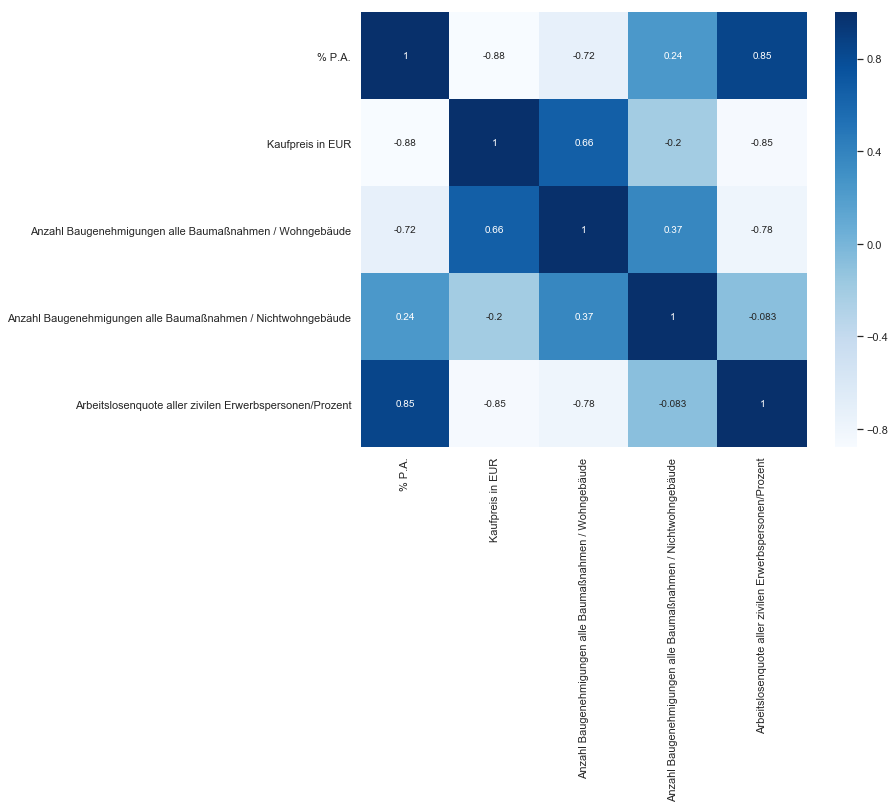

In [106]:
Var_Corr = dfMerge.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="Blues")

<div class="alert alert-block alert-info">

Die höchste positive Korrelation ergab sich aus den Entwicklungen der Kaufpreise für Wohnimmobilien mit der Anzahl der Baugenehmigungen Wohngebäude. Zwischen der Zinsentwicklung und den Baugenehmigungen bestehen hingegen eine stark negative Korrelation. Dasselbe gilt auch für die Arbeitslosenquote.

Die interessanten Korrelationen sind in den folgenden Grafiken ilustriert

In [107]:
dfMerge["Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 10"]=dfMerge["Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude"]/10
dfMerge["Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 1000"]=dfMerge["Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude"]/1000

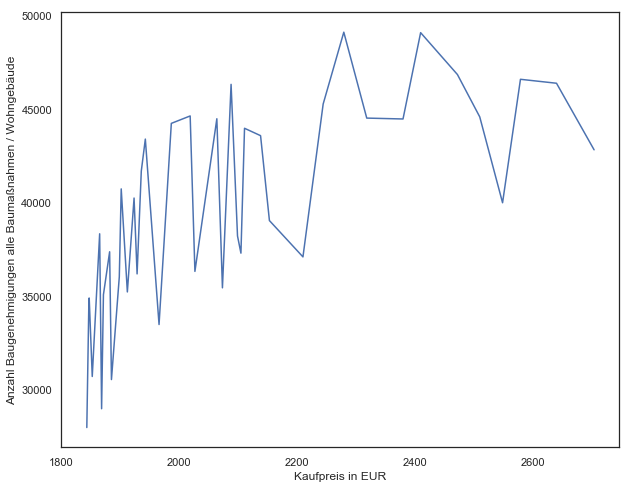

In [108]:
CorrData = dfMerge

paletteSNS = sns.color_palette("mako_r", 6)
sns.set_style("white")

g = sns.lineplot(x="Kaufpreis in EUR", y="Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude",palette=paletteSNS, data=CorrData)
plt.rcParams['figure.figsize']=(10,8)
plt.show()

In [109]:
sourceVergKpBM=ColumnDataSource(dfMerge)

p1VergKpBM=figure( x_axis_type="datetime", y_axis_label='Anzahl / 10', y_range=(0,dfMerge[['Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 10']].values.max()+1000), width=700, plot_height=500, title="Entwicklung Kaufpreise vs. Anzahl Baugnehmigungen Wohngebäude", tools="crosshair,pan, wheel_zoom")
p1VergKpBM.extra_y_ranges = {"Kaufpreis": Range1d(start=0, end=5900)}
p1VergKpBM.add_layout(LinearAxis(y_range_name="Kaufpreis", axis_label='EUR pro qm'), 'right')

p1VergKpBM.line(x='Stichtag', y='Kaufpreis in EUR', line_width=3, source=sourceVergKpBM, color=Viridis3[1], legend='Kaufpreis EUR pro qm')
p1VergKpBM.line(x='Stichtag', y='Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 10', line_width=3, source=sourceVergKpBM, color=Viridis3[2], legend='Anzahl Baugenehmigungen/10')

show(p1VergKpBM)

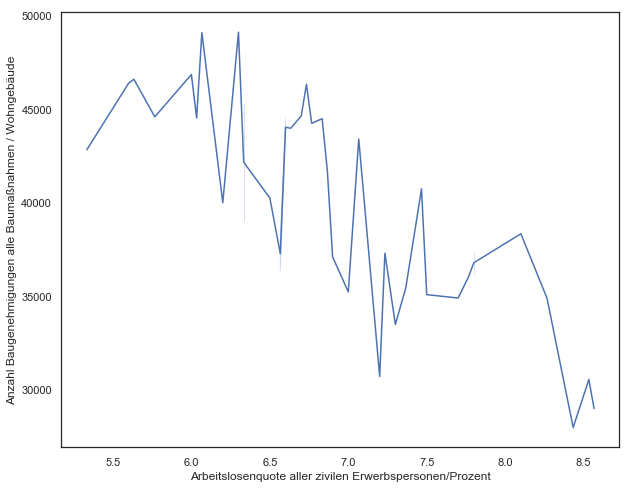

In [110]:
CorrDataAlo = dfMerge

paletteSNS = sns.color_palette("mako_r", 6)
sns.set_style("white")

g = sns.lineplot(x="Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent", y="Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude",palette=paletteSNS, data=CorrDataAlo)
plt.rcParams['figure.figsize']=(10,8)

plt.show()

In [111]:
sourceVergAlo=ColumnDataSource(dfMerge)

p1VergAlo=figure( x_axis_type="datetime", y_axis_label='in Prozent', y_range=(0,dfMerge[['Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 1000']].values.max()+3), width=700, plot_height=500, title="Entwicklung Arbeitslosenquote vs. Anzahl Baugnehmigungen Wohngebäude", tools="crosshair,pan, wheel_zoom")
p1VergAlo.extra_y_ranges = {"Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent": Range1d(start=0, end=52)}
p1VergAlo.add_layout(LinearAxis(y_range_name="Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent"), 'right')

p1VergAlo.line(x='Stichtag', y='Arbeitslosenquote aller zivilen Erwerbspersonen/Prozent', line_width=3, source=sourceVergAlo, color=Viridis3[1], legend='Arbeitslosenquote')
p1VergAlo.line(x='Stichtag', y='Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 1000', line_width=3, source=sourceVergAlo, color=Viridis3[2], legend='Anzahl Baugenehmigungen in 1000')

p1VergAlo.legend.location = "top_left"

show(p1VergAlo)

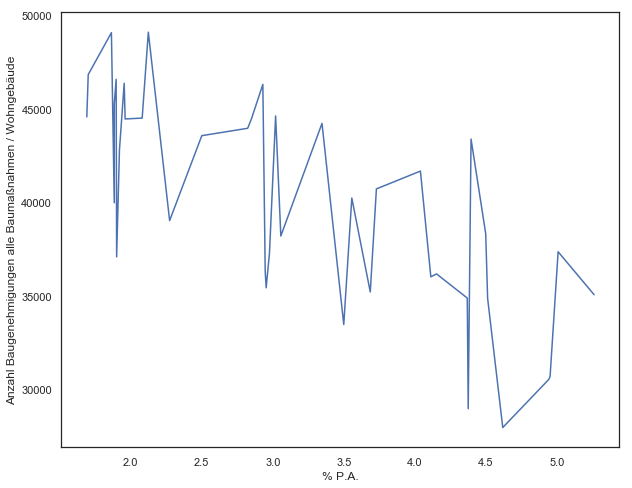

In [112]:
CorrDataZins = dfMerge

paletteSNS = sns.color_palette("mako_r", 6)
sns.set_style("white")

g = sns.lineplot(x="% P.A.", y="Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude",palette=paletteSNS, data=CorrDataZins)
plt.rcParams['figure.figsize']=(10,8)

plt.show()

In [113]:
sourceVergKpBM=ColumnDataSource(dfMerge)

p1VergKpBM=figure( x_axis_type="datetime", y_axis_label='Anzahl / 1000', y_range=(0,dfMerge[['Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 1000']].values.max()+3), width=700, plot_height=500, title="Entwicklung Zinsen (10 J) vs. Anzahl Baugnehmigungen Wohngebäude", tools="crosshair,pan, wheel_zoom")
p1VergKpBM.extra_y_ranges = {"% p.a.": Range1d(start=0, end=52)}
p1VergKpBM.add_layout(LinearAxis(y_range_name="% p.a."), 'right')

p1VergKpBM.line(x='Stichtag', y='% P.A.', line_width=3, source=sourceVergKpBM, color=Viridis3[1], legend='Zins in % p.a.')
p1VergKpBM.line(x='Stichtag', y='Anzahl Baugenehmigungen alle Baumaßnahmen / Wohngebäude in 1000', line_width=3, source=sourceVergKpBM, color=Viridis3[2], legend='Anzahl Baugenehmigungen in 1000')

p1VergKpBM.legend.location = "top_left"

show(p1VergKpBM)

## 6. Korrelationen und Zusammenhänge auf Level Jahr

In [114]:
dfsY = [dfGewerbep,dfGehaltent,dfBauGenWgb1,dfBauGenNwgb1]
dfMergeY = reduce(lambda left,right: pd.merge(left,right,on='Stichtag'), dfsY)

dfMergeY=dfMergeY.rename(columns={dfMergeY.columns[1]: 'Preise Gewerbeimmobilien Index (2010=100)',                                
                                dfMergeY.columns[5]:'Anz. Baugen. alle Baumaßnahmen / Wohngebäude',
                                dfMergeY.columns[6]: 'Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude'})
dfMergeY= dfMergeY.drop(['Jahr_x', 'Jahr_y'],axis=1)
dfMergeY

,Preise Gewerbeimmobilien Index (2010=100),Stichtag,Durchschnittseinkommen in EUR,Anz. Baugen. alle Baumaßnahmen / Wohngebäude,Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude
0,99,2003-12-31,26214,254852,43927
1,93,2004-12-31,26332,227515,44172
2,93,2005-12-31,26524,198891,43211
3,105,2006-12-31,26765,201190,46640
4,106,2007-12-31,27196,141366,46850
5,105,2008-12-31,27827,133653,50395
6,100,2009-12-31,27728,136049,48474
7,100,2010-12-31,27997,140929,50373
8,102,2011-12-31,28333,161468,51681
9,106,2012-12-31,30432,158629,49625


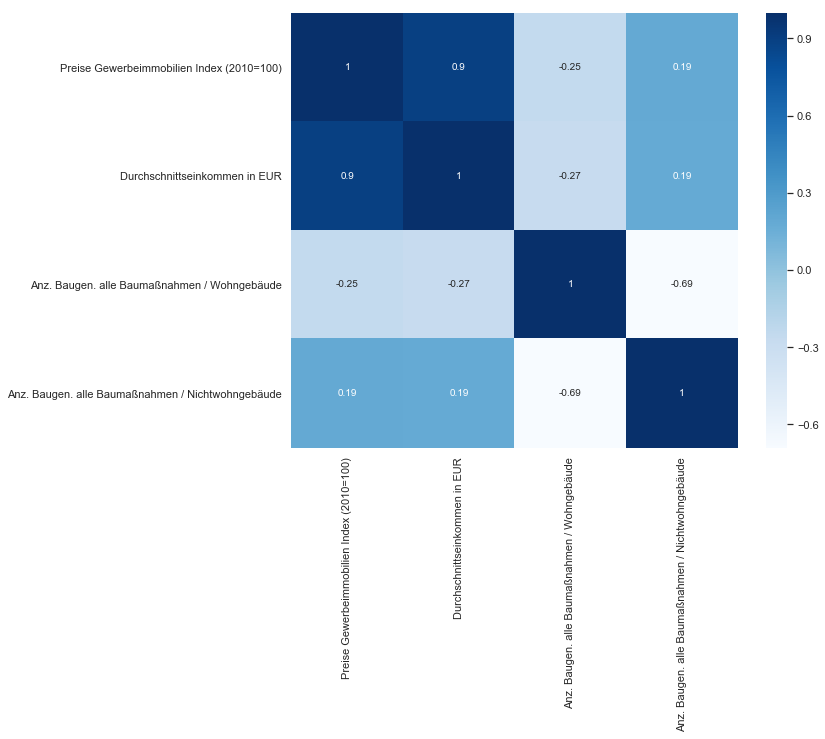

In [115]:
Var_CorrY = dfMergeY.corr()
sns.heatmap(Var_CorrY, xticklabels=Var_CorrY.columns, yticklabels=Var_CorrY.columns, annot=True, cmap="Blues")

<div class="alert alert-block alert-info">

Aufgrund der wenigen Datenpunkte bei einer jährlichen Untersuchung kann die Korrelationsmatrix lediglich als erste Orientierungshilfe dienen.

Die höchste Korrelation besteht interessanterweise zwischen der Entwicklung der Durchschnittseinkommen und den Baugenehmigungen Nichtwohngebäude. Weniger hingegen korrelliert die Einkommsentwicklung mit den Baugnehmigungen im Wohngebäudebereich.


Die interessanten Korrelationen sind in den folgenden Grafiken ilustriert

In [116]:
dfMergeY["Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude in 1000"]=dfMergeY["Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude"]/1000

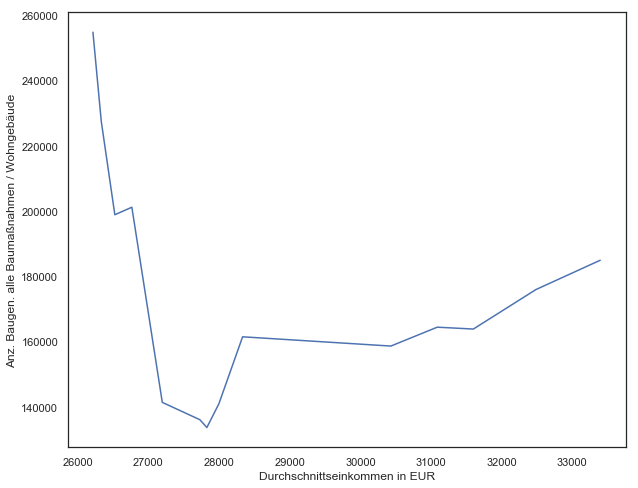

In [117]:
CorrDataY = dfMergeY

paletteSNS = sns.color_palette("mako_r", 6)
sns.set_style("white")

g = sns.lineplot(x="Durchschnittseinkommen in EUR", y="Anz. Baugen. alle Baumaßnahmen / Wohngebäude",palette=paletteSNS, data=CorrDataY)
plt.rcParams['figure.figsize']=(10,8)

plt.show()

In [118]:
sourceVergYKPI=ColumnDataSource(dfMergeY)

p1VergYKpEink=figure( x_axis_type="datetime", y_axis_label='Anzahl', y_range=(0,dfMergeY[['Anz. Baugen. alle Baumaßnahmen / Wohngebäude']].values.max()+3), width=700, plot_height=500, title="Durchschnittseinkommen vs. Baugenehmigungen Wohngebäude", tools="crosshair,pan, wheel_zoom")
p1VergYKpEink.extra_y_ranges = {"Durchschnittseinkommen in EUR": Range1d(start=0, end=255000)}
p1VergYKpEink.add_layout(LinearAxis(y_range_name="Durchschnittseinkommen in EUR", axis_label='EUR'), 'right')

p1VergYKpEink.line(x='Stichtag', y='Durchschnittseinkommen in EUR', line_width=3, source=sourceVergYKPI, color=Viridis3[1], legend='Durchschnittseink. in EUR')
p1VergYKpEink.line(x='Stichtag', y='Anz. Baugen. alle Baumaßnahmen / Wohngebäude', line_width=3, source=sourceVergYKPI, color=Viridis3[2], legend='Anzahl Baugenehmigungen')

p1VergYKpEink.yaxis[0].formatter = NumeralTickFormatter(format="0")
p1VergYKpEink.yaxis[1].formatter = NumeralTickFormatter(format="0")

show(p1VergYKpEink)

In [119]:
sourceVergYKPI=ColumnDataSource(dfMergeY)

p1VergYKpEinkNWG=figure( x_axis_type="datetime", y_axis_label='Anzahl', y_range=(0,dfMergeY[['Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude']].values.max()+3), width=700, plot_height=500, title="Durchschnittseinkommen vs. Baugenehmigungen Nichtwohngebäude", tools="crosshair,pan, wheel_zoom")
p1VergYKpEinkNWG.extra_y_ranges = {"Durchschnittseinkommen in EUR": Range1d(start=0, end=52000)}
p1VergYKpEinkNWG.add_layout(LinearAxis(y_range_name="Durchschnittseinkommen in EUR", axis_label='EUR'), 'right')

p1VergYKpEinkNWG.line(x='Stichtag', y='Durchschnittseinkommen in EUR', line_width=3, source=sourceVergYKPI, color=Viridis3[1], legend='Durchschnittseink. in EUR')
p1VergYKpEinkNWG.line(x='Stichtag', y='Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude', line_width=3, source=sourceVergYKPI, color=Viridis3[2], legend='Anzahl Baugenehmigungen')

p1VergYKpEinkNWG.legend.location = "bottom_left"

show(p1VergYKpEinkNWG)

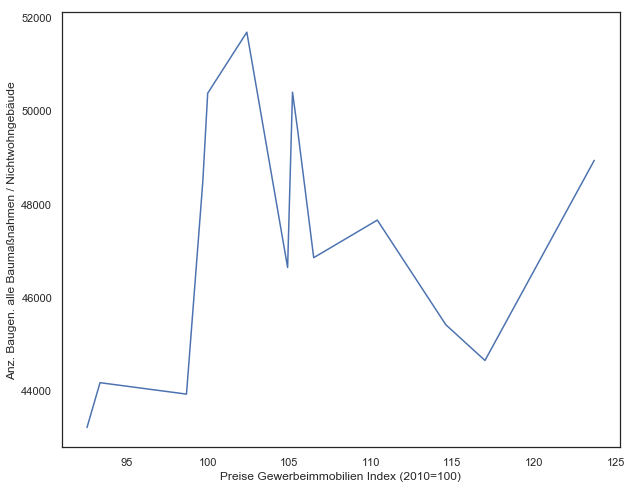

In [120]:
paletteSNS = sns.color_palette("mako_r", 6)
sns.set_style("white")

g = sns.lineplot(x="Preise Gewerbeimmobilien Index (2010=100)", y="Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude",palette=paletteSNS, data=CorrDataY)
plt.rcParams['figure.figsize']=(10,8)

plt.show()

In [121]:
sourceVergYKPI=ColumnDataSource(dfMergeY)

p1VergYKpPindGew=figure( x_axis_type="datetime", y_axis_label='Anzahl/1000', y_range=(0,150), width=700, plot_height=500, title="Preisindex Gewerbeimmobilien vs. Baugenehmigungen Nichtwohngebäude", tools="crosshair,pan, wheel_zoom")
p1VergYKpPindGew.extra_y_ranges = {"Preise Gewerbeimmobilien Index (2010=100)": Range1d(start=0, end=150)}
p1VergYKpPindGew.add_layout(LinearAxis(y_range_name="Preise Gewerbeimmobilien Index (2010=100)", axis_label='Index'), 'right')

p1VergYKpPindGew.line(x='Stichtag', y='Preise Gewerbeimmobilien Index (2010=100)', line_width=3, source=sourceVergYKPI, color=Viridis3[1], legend='Preidindex')
p1VergYKpPindGew.line(x='Stichtag', y='Anz. Baugen. alle Baumaßnahmen / Nichtwohngebäude in 1000', line_width=3, source=sourceVergYKPI, color=Viridis3[2], legend='Anzahl Baugenehmigungen in 1000')

show(p1VergYKpPindGew)

<a id='D'></a>

# D. Detaillierte Entwicklungen je Bundesland – kurzfristige Entwicklung

## 2. Baugenehmigungen

** Datasets laden **

In [122]:
dfPersEnt=m7.getGenesisData("_Pers_Entgelt_Umsatz_BauHauptgew_Monat.csv",6 ,7 )
dfBevoelk=m7.getGenesisData("Einwohner_Bundesland.csv",4 ,6)
germany1 = gpd.read_file('map_shapefile/gadm36_DEU_shp/gadm36_DEU_1.shp')
germany = gpd.read_file('map_shapefile/gadm36_DEU_1/gadm36_DEU_1.shp',encoding="utf-8")

In [123]:
dfPersEnt

,Bundesland,Jahr,Monat,Tätige Personen/Anzahl,Entgelte/Tsd. EUR,Umsatz/Tsd. EUR,Date
0,Baden-Württemberg,1995,1,146386,259704,685970,1995-01-01
1,Baden-Württemberg,1995,2,145978,265202,750538,1995-02-01
2,Baden-Württemberg,1995,3,149313,308761,1027498,1995-03-01
3,Baden-Württemberg,1995,4,148391,293536,1001328,1995-04-01
4,Baden-Württemberg,1995,5,148073,327855,1072798,1995-05-01
5,Baden-Württemberg,1995,6,147385,319070,1106227,1995-06-01
6,Baden-Württemberg,1995,7,146851,317406,1151137,1995-07-01
7,Baden-Württemberg,1995,8,146836,338702,1027650,1995-08-01
8,Baden-Württemberg,1995,9,146597,306800,1079315,1995-09-01
9,Baden-Württemberg,1995,10,145614,315343,1172207,1995-10-01


In [124]:
dfBevoelk

,Bevölkerungsstand (Anzahl)//,Stichtag/31.12.2008,Stichtag/31.12.2009,Stichtag/31.12.2010,Stichtag/31.12.2011,Stichtag/31.12.2012,Stichtag/31.12.2013,Stichtag/31.12.2014,Stichtag/31.12.2015,Stichtag/31.12.2016,Stichtag/31.12.2017
0,Baden-Württemberg,10749506,10744921,10753880,10512441,10569111,10631278,10716644,10879618,10951893,11023425
1,Bayern,12519728,12510331,12538696,12443372,12519571,12604244,12691568,12843514,12930751,12997204
2,Berlin,3431675,3442675,3460725,3326002,3375222,3421829,3469849,3520031,3574830,3613495
3,Brandenburg,2522493,2511525,2503273,2453180,2449511,2449193,2457872,2484826,2494648,2504040
4,Bremen,661866,661716,660706,652182,654774,657391,661888,671489,678753,681032
5,Hamburg,1772100,1774224,1786448,1718187,1734272,1746342,1762791,1787408,1810438,1830584
6,Hessen,6064953,6061951,6067021,5993771,6016481,6045425,6093888,6176172,6213088,6243262
7,Mecklenburg-Vorpommern,1664356,1651216,1642327,1606899,1600327,1596505,1599138,1612362,1610674,1611119
8,Niedersachsen,7947244,7928815,7918293,7774253,7778995,7790559,7826739,7926599,7945685,7962775
9,Nordrhein-Westfalen,17933064,17872763,17845154,17544938,17554329,17571856,17638098,17865516,17890100,17912134


Mapfiles from https://gadm.org/maps/DEU_1.html

In [125]:
germany

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,DEU,Germany,DEU.1_1,Baden-Württemberg,None,None,Land,State,08,DE.BW,"(POLYGON ((8.708021159999999 47.6895752, 8.692..."
1,DEU,Germany,DEU.2_1,Bayern,Bavaria,None,Freistaat,None,09,DE.BY,"POLYGON ((9.72968674 47.5340538, 9.72934914 47..."
2,DEU,Germany,DEU.3_1,Berlin,None,None,Land,State,11,DE.BE,"POLYGON ((13.17135715 52.3977623, 13.17152119 ..."
3,DEU,Germany,DEU.4_1,Brandenburg,None,None,Land,State,12,DE.BR,"(POLYGON ((12.26715565 52.2313118, 12.2752037 ..."
4,DEU,Germany,DEU.5_1,Bremen,None,None,Freie Hansestadt,State,04,DE.HB,"(POLYGON ((8.711423870000001 53.04463196, 8.70..."
5,DEU,Germany,DEU.6_1,Hamburg,None,None,Freie und Hansestadt,State,02,DE.HH,"(POLYGON ((10.30795383 53.43320084, 10.3036804..."
6,DEU,Germany,DEU.7_1,Hessen,Hesse,None,Land,State,06,DE.HE,"(POLYGON ((8.680587770000001 49.62247086, 8.68..."
7,DEU,Germany,DEU.8_1,Mecklenburg-Vorpommern,Mecklenburg-West Pomerania,None,Land,State,13,DE.MV,"(POLYGON ((11.4958334 54.03180695, 11.4958334 ..."
8,DEU,Germany,DEU.9_1,Niedersachsen,Lower Saxony,None,Land,State,03,DE.NI,"(POLYGON ((6.76194477 53.61875153, 6.76527691 ..."
9,DEU,Germany,DEU.10_1,Nordrhein-Westfalen,North Rhine-Westphalia,None,Land,State,05,DE.NW,"POLYGON ((6.40502834 50.32330704, 6.40787029 5..."


<class 'geopandas.geodataframe.GeoDataFrame'>


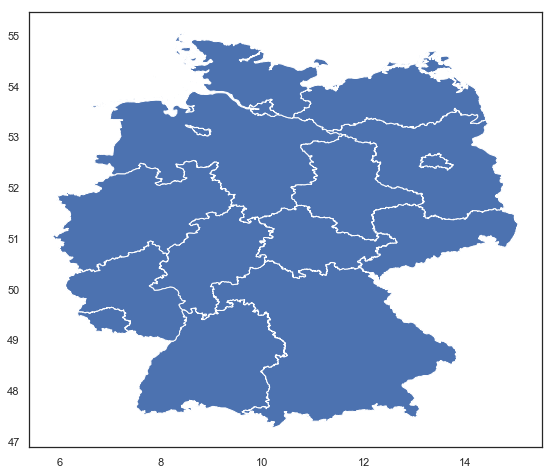

In [126]:
germany.plot()
print(type(germany))

<div class="alert alert-block alert-info">

Geopandas mit Matplotlib hat sich nach ersten Tests als zu unflexibel erwiesen. Bokeh zeigt sich in Verbindung mit GeoJSON als Mittel der Wahl um Choropleth Diagramme mit .shp Dateien zu visualisieren.

https://mapshaper.org/

Mapshaper empfiehlt sich bei zu detaillierten .shp Dateien. Hier kann prozentual skaliert werden.

** Berechnung der Kennzahlen und Zusammenführen der Dataframes  **

In [127]:
dfBevoelkSel=dfBevoelk[['Bevölkerungsstand (Anzahl)//','Stichtag/31.12.2008','Stichtag/31.12.2016']]
dfBevoelkSel=dfBevoelkSel.rename(columns={dfBevoelkSel.columns[0]: 'Bundesland',dfBevoelkSel.columns[1]: '2008', dfBevoelkSel.columns[2]: '2016'})

dfBevoelkSel2008=dfBevoelkSel[['Bundesland','2008']]
dfBevoelkSel2008=dfBevoelkSel2008.rename(columns={dfBevoelkSel2008.columns[1]: 'Einwohner'})

dfBevoelkSel2016=dfBevoelkSel[['Bundesland','2016']]
dfBevoelkSel2016=dfBevoelkSel2016.rename(columns={dfBevoelkSel2016.columns[1]: 'Einwohner'})

In [128]:
dfBhgesamt=dfPersEnt.groupby(['Bundesland',"Jahr"], as_index=False)['Tätige Personen/Anzahl','Entgelte/Tsd. EUR','Umsatz/Tsd. EUR'].mean()
dfBhgesamt2008=dfBhgesamt.groupby(["Jahr"], as_index=False).get_group(2008)
dfBhgesamt2016=dfBhgesamt.groupby(["Jahr"], as_index=False).get_group(2016)

In [129]:
dfMerge2008 = pd.merge(dfBevoelkSel2008,dfBhgesamt2008,on='Bundesland')
dfMerge2008['Tätige Personen/Anzahl pro 100.000 Einwohner']=dfMerge2008['Tätige Personen/Anzahl']/(dfMerge2008['Einwohner']/100000)
dfMerge2008['Umsatz in Tsd. EUR pro 100.000 Einwohner']=dfMerge2008['Umsatz/Tsd. EUR']/(dfMerge2008['Einwohner']/100000)

dfMerge2016 = pd.merge(dfBevoelkSel2016,dfBhgesamt2016,on='Bundesland')
dfMerge2016['Tätige Personen/Anzahl pro 100.000 Einwohner']=dfMerge2016['Tätige Personen/Anzahl']/(dfMerge2016['Einwohner']/100000)
dfMerge2016['Umsatz in Tsd. EUR pro 100.000 Einwohner']=dfMerge2016['Umsatz/Tsd. EUR']/(dfMerge2016['Einwohner']/100000)
dfMerge2016

,Bundesland,Einwohner,Jahr,Tätige Personen/Anzahl,Entgelte/Tsd. EUR,Umsatz/Tsd. EUR,Tätige Personen/Anzahl pro 100.000 Einwohner,Umsatz in Tsd. EUR pro 100.000 Einwohner
0,Baden-Württemberg,10951893,2016,96465,269181,1230942,881,11240
1,Bayern,12930751,2016,145548,385263,1780479,1126,13769
2,Berlin,3574830,2016,21511,52834,283898,602,7942
3,Brandenburg,2494648,2016,34049,74328,368149,1365,14758
4,Bremen,678753,2016,4572,11509,56418,674,8312
5,Hamburg,1810438,2016,8649,27166,166129,478,9176
6,Hessen,6213088,2016,56737,137181,588165,913,9467
7,Mecklenburg-Vorpommern,1610674,2016,15274,34530,163275,948,10137
8,Niedersachsen,7945685,2016,84268,224749,1012595,1061,12744
9,Nordrhein-Westfalen,17890100,2016,132568,357059,1483168,741,8290


<div class="alert alert-block alert-info">

**Quelle Einwohnerdatei:** https://www-genesis.destatis.de/genesis/online

Zur besseren Vergleichbarkeit wurden die Daten auf pro 100.000 Einwohner normiert. 

In [130]:
GeoDFinclData2016=germany.join(dfMerge2016.set_index('Bundesland'), on='NAME_1')
GeoDFinclData2008=germany.join(dfMerge2008.set_index('Bundesland'), on='NAME_1')
GeoDFinclData2008.sort_index(inplace=True, ascending=False )
GeoDFinclData2016.sort_index(inplace=True, ascending=False )

In [131]:
GeoDFinclData2016

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Einwohner,Jahr,Tätige Personen/Anzahl,Entgelte/Tsd. EUR,Umsatz/Tsd. EUR,Tätige Personen/Anzahl pro 100.000 Einwohner,Umsatz in Tsd. EUR pro 100.000 Einwohner
15,DEU,Germany,DEU.16_1,Thüringen,Thuringia,None,Freistaat,State,16,DE.TH,"POLYGON ((10.04133797 50.51646805, 10.04220009...",2158128,2016,25729,56765,266865,1192,12366
14,DEU,Germany,DEU.15_1,Schleswig-Holstein,None,None,Land,State,01,DE.SH,"(POLYGON ((9.52684975 53.66425705, 9.519747730...",2881926,2016,25595,63969,278964,888,9680
13,DEU,Germany,DEU.13_1,Sachsen-Anhalt,Saxony-Anhalt,None,Land,State,15,DE.ST,"(POLYGON ((11.44027328 51.19976044, 11.4466142...",2236252,2016,28974,64810,278011,1296,12432
12,DEU,Germany,DEU.14_1,Sachsen,Saxony,None,Freistaat,State,14,DE.SN,"POLYGON ((12.10090065 50.3180275, 12.09798241 ...",4081783,2016,57226,122634,561450,1402,13755
11,DEU,Germany,DEU.12_1,Saarland,None,None,Land,State,10,DE.SL,"POLYGON ((6.38005257 49.5511055, 6.3939147 49....",996651,2016,8952,24018,90830,898,9113
10,DEU,Germany,DEU.11_1,Rheinland-Pfalz,Rhineland-Palatinate,None,Land,State,07,DE.RP,"POLYGON ((6.38005257 49.5511055, 6.38225365 49...",4066053,2016,39953,101987,432976,983,10649
9,DEU,Germany,DEU.10_1,Nordrhein-Westfalen,North Rhine-Westphalia,None,Land,State,05,DE.NW,"POLYGON ((6.40502834 50.32330704, 6.40787029 5...",17890100,2016,132568,357059,1483168,741,8290
8,DEU,Germany,DEU.9_1,Niedersachsen,Lower Saxony,None,Land,State,03,DE.NI,"(POLYGON ((6.76194477 53.61875153, 6.76527691 ...",7945685,2016,84268,224749,1012595,1061,12744
7,DEU,Germany,DEU.8_1,Mecklenburg-Vorpommern,Mecklenburg-West Pomerania,None,Land,State,13,DE.MV,"(POLYGON ((11.4958334 54.03180695, 11.4958334 ...",1610674,2016,15274,34530,163275,948,10137
6,DEU,Germany,DEU.7_1,Hessen,Hesse,None,Land,State,06,DE.HE,"(POLYGON ((8.680587770000001 49.62247086, 8.68...",6213088,2016,56737,137181,588165,913,9467


In [134]:
palette1=PuBu[9]
palette1.reverse()
palette1

['#fff7fb',
 '#ece7f2',
 '#d0d1e6',
 '#a6bddb',
 '#74a9cf',
 '#3690c0',
 '#0570b0',
 '#045a8d',
 '#023858']

In [135]:

# Convert GeoDataFrames into GeoJSONDataSource objects (similar to ColumnDataSource)
point_source2016 = GeoJSONDataSource(geojson=GeoDFinclData2016.to_json())
point_source2008 = GeoJSONDataSource(geojson=GeoDFinclData2008.to_json())
plot_source=point_source2016

# Color Mapper 
mapper1 = linear_cmap(field_name='Tätige Personen/Anzahl pro 100.000 Einwohner', palette=palette1  ,low=min(GeoDFinclData2008["Tätige Personen/Anzahl pro 100.000 Einwohner"]) ,high=max(GeoDFinclData2016["Tätige Personen/Anzahl pro 100.000 Einwohner"]))
mapper2 = linear_cmap(field_name='Umsatz in Tsd. EUR pro 100.000 Einwohner', palette=palette1  ,low=min(GeoDFinclData2008["Umsatz in Tsd. EUR pro 100.000 Einwohner"]) ,high=max(GeoDFinclData2016["Umsatz in Tsd. EUR pro 100.000 Einwohner"]))


# Initialize our plot figure
p1 = figure(title="Tätige Personen/Anzahl pro 100.000 Einwohner", toolbar_location="left",
           plot_width=650, plot_height=800)
p2 = figure(title="Umsatz in Tsd. EUR pro 100.000 Einwohner", toolbar_location="left",
           plot_width=650, plot_height=800)


# Add the lines to the map from our GeoJSONDataSource -object (it is important to specify the columns as 'xs' and 'ys')
p1.patches(xs='xs', ys='ys', fill_color=mapper1,
          line_color="black", source=plot_source, fill_alpha=1)
p2.patches(xs='xs', ys='ys', fill_color=mapper2,
          line_color="black", source=plot_source, fill_alpha=1)


p1.add_tools(HoverTool(
    tooltips=[
        ( 'Bundesland',  '@{NAME_1}' ),
        ( 'Tätige Personen/Anzahl pro 100.000 Einwohner',   '@{Tätige Personen/Anzahl pro 100.000 Einwohner}{0,0}'),
        ( 'Umsatz in Tsd. EUR pro 100.000 Einwohner',   '@{Umsatz in Tsd. EUR pro 100.000 Einwohner}{0,0.00}')
    ],
    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='mouse'
))

p2.add_tools(HoverTool(
    tooltips=[
        ( 'Bundesland',  '@{NAME_1}' ),
        ( 'Tätige Personen/Anzahl pro 100.000 Einwohner',   '@{Tätige Personen/Anzahl pro 100.000 Einwohner}{0,0}'),
        ( 'Umsatz in Tsd. EUR pro 100.000 Einwohner',   '@{Umsatz in Tsd. EUR pro 100.000 Einwohner}{0,0.00}')
    ],
    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='mouse'
))


#color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
#                     label_standoff=12, border_line_color=None, location=(0,0))
color_bar1 = ColorBar(color_mapper=mapper1["transform"], major_label_text_font_size="10pt",
                         ticker=BasicTicker(desired_num_ticks=8),
                         formatter=PrintfTickFormatter(format="%d"),
                         label_standoff=10, border_line_color=None, location=(0, 0))
color_bar2 = ColorBar(color_mapper=mapper2["transform"], major_label_text_font_size="10pt",
                         ticker=BasicTicker(desired_num_ticks=8),
                         formatter=PrintfTickFormatter(format="%d"),
                         label_standoff=10, border_line_color=None, location=(0, 0))


#color_bar = ColorBar(color_mapper=mapper['transform'], ticker=LogTicker(), width=8,  location=(0,0))
p1.add_layout(color_bar1, 'right')
p2.add_layout(color_bar2, 'right')


callback = CustomJS(args=dict(s1=point_source2016, s2=point_source2008, s3=plot_source), code="""
    var data2016 = s1.data;
    var data2008 = s2.data;
    var data3 = s3.data;
    var f = cb_obj.value
    var x2016 = data2016['Tätige Personen/Anzahl pro 100.000 Einwohner']
    var y2016 = data2016['Umsatz in Tsd. EUR pro 100.000 Einwohner']
    var x2008 = data2008['Tätige Personen/Anzahl pro 100.000 Einwohner']
    var y2008 = data2008['Umsatz in Tsd. EUR pro 100.000 Einwohner']
    var xplot = data3['Tätige Personen/Anzahl pro 100.000 Einwohner']
    var yplot = data3['Umsatz in Tsd. EUR pro 100.000 Einwohner']
    console.log(f)
    for (var i = 0; i < xplot.length; i++) {
        if (f == 2008) {
            xplot[i]=x2008[i]
            yplot[i]=y2008[i]
            console.log(x2008[i])
        } else if (f == 2016) {
            xplot[i]=x2016[i]
            yplot[i]=y2016[i]
            console.log(x2016[i])
            
        }
            
    }
    s3.change.emit();
""")

#Slider 
slider = Slider(start=2008, end=2016, value=2016, step=10, title="Jahr", callback=callback)

grid = gridplot([[widgetbox(slider), None], [p1, p2]])

# Output filepath
outfp = r"map_shapefile/map.html"

#Save Map
save(grid, outfp)

#show(grid) - Downgrading again to bokeh version 0.12.16

'D:\\OneDrive\\04_M7_Gruppenprojekt\\Jupyter\\map_shapefile\\map.html'

<a id='Fazit'></a>

<div class="alert alert-block alert-info">

**Anmerkung zur Grafik:**
Interessanterweise sind sowohl bei den tätigen Personen als auch beim Umsatz folgendes Bild: In den östlichen Bundesländern werden sehr hohe Werte je 100.000 Einwohner erzielt. Dies gilt sowohl für das Jahr 2016 als auch für 2008 - wenn auch in schwächerem Ausmaß. Da nicht bekannt ist, wo die Umsätze erfasst werden, könnte eine mögliche Erklärung sein, dass viele Handwerker aus diesen Bundesländern Aufträge im Westen annehmen.


**Anmerkung zur Erstellung:**
Durch Einsatz von GeoJSONDataSource kann Bokeh mit .shp Dateien umgehen. Es werden Color Mapper zur Bestimmung der Farbe (Hitze) der Bundesländer verwendet. Die Grenzen der Bundesländer werden als Patches mit xs und ys Koordinaten erstellt. Zusätzlich werden Tooltips pro Bundesland generiert. "mode='mouse'" führt dazu, dass der Tooltip innerhalb der Grenze eines Bundeslandes angezeigt wird.

Der Slider wird über eine JavaScript Callback Funktion gesteuert. Die Plot_source wird je nach Slider Position von der passenden Jahreszahl abgeleitet.

Da die Grafik teilweise länger zur Anzeige benötigt wurde diese als eigene Datei herausgeschrieben.

## Fazit:

- Datensätze des Statistischen Bundesamts sind bereits stark aggregiert. Deshalb für Statistische Analysen nur bedingt geeignet

- Zuverlässigkeit der Datenbank (GENESIS) teilweise nicht gegeben (4 Tage Ausfall wegen Datenmigration)

- Korrelationen sind auf Basis von Jahr/Quartal schwierig zu erkennen und statistisch nur bedingt belastbar

- Preise / Flächen / Genehmigungen / Umsätze / Mitarbeiter steigen alle seit der Krise bei fallenden Zinsen

## Lessons Learned:
- "Viele Wege führen nach Rom". Jedes Problem lässt sich über verschiedene Möglichkeiten lösen. Die Vielzahl der Packages führt aber auch dazu, dass möglicherweise nicht immer die optimale Lösung verwendet wird.
- Sobald die Grundlagen der Charts verstanden sind, die die Anpassungs und Veränderungsmöglichkeiten sehr flexibel. Bei wiederkehrenden Datensätzen eine echte Alternative zu Excel
- Pandas zur schnellen Voranalyse der Daten eine gute Lösung
- Stackoverflow gibt für fast jedes Problem eine Lösung. Aber oft macht es Sinn vorher einen Blick in die Paketbeschreibung zu werfen. Dort findet man teilweise einfachere Beispiele oder entwickelt auf Basis der Beschreibung eine eigene Lösung
- Auf Versionen achten! Nicht während der Entwicklung updaten.
- Viel gelernt.